# Double Pendulum Small Vibrations CUED IB Mechanics

The following code is mostly completed for you: press 'shift-enter' in each cell to run the code starting at the top. You will get some errors part of the way through and this is where you need to fill in the gaps.



Import standard set of modules for scientific computing and plotting [ALREADY COMPLETE]:

In [123]:
import numpy as np
import scipy as sp
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18,'font.family':'serif'})

This cell loads the experimental data on the examples sheet for experiments 1, 2 and 3.
The final format for each experiment is an array of four items, ["name of experiment", timepoints, alphas, betas],
where timepoints is a list of the time points, and alphas/betas are lists of the alpha/beta angles (in degrees) at each time point.
[ALREADY COMPLETE]:

In [124]:
# This cell loads the experimental data for experiments 1, 2 and 3 on the examples sheet.


time_exp_1 = np.array([0.,0.0111111,0.0222222,0.0333333,0.0444444,0.0555556,0.0666667,0.0777778,0.0888889,0.1,0.111111,0.122222,0.133333,0.144444,0.155556,0.166667,0.177778,0.188889,0.2,0.211111,0.222222,0.233333,0.244444,0.255556,0.266667,0.277778,0.288889,0.3,0.311111,0.322222,0.333333,0.344444,0.355556,0.366667,0.377778,0.388889,0.4,0.411111,0.422222,0.433333,0.444444,0.455556,0.466667,0.477778,0.488889,0.5,0.511111,0.522222,0.533333,0.544444,0.555556,0.566667,0.577778,0.588889,0.6,0.611111,0.622222,0.633333,0.644444,0.655556,0.666667,0.677778,0.688889,0.7,0.711111,0.722222,0.733333,0.744444,0.755556,0.766667,0.777778,0.788889,0.8,0.811111,0.822222,0.833333,0.844444,0.855556,0.866667,0.877778,0.888889,0.9,0.911111,0.922222,0.933333,0.944444,0.955556,0.966667,0.977778,0.988889,1.,1.01111,1.02222,1.03333,1.04444,1.05556,1.06667,1.07778,1.08889,1.1,1.11111,1.12222,1.13333,1.14444,1.15556,1.16667,1.17778,1.18889,1.2,1.21111,1.22222,1.23333,1.24444,1.25556,1.26667,1.27778,1.28889,1.3,1.31111,1.32222,1.33333,1.34444,1.35556,1.36667,1.37778,1.38889,1.4,1.41111,1.42222,1.43333,1.44444,1.45556,1.46667,1.47778,1.48889,1.5,1.51111,1.52222,1.53333,1.54444,1.55556,1.56667,1.57778,1.58889,1.6,1.61111,1.62222,1.63333,1.64444,1.65556,1.66667,1.67778,1.68889,1.7,1.71111,1.72222,1.73333,1.74444,1.75556,1.76667,1.77778,1.78889,1.8,1.81111,1.82222,1.83333,1.84444,1.85556,1.86667,1.87778,1.88889,1.9,1.91111,1.92222,1.93333,1.94444,1.95556,1.96667,1.97778,1.98889,2.,2.01111,2.02222,2.03333,2.04444,2.05556,2.06667,2.07778,2.08889,2.1,2.11111,2.12222,2.13333,2.14444,2.15556,2.16667,2.17778,2.18889,2.2,2.21111,2.22222,2.23333,2.24444,2.25556,2.26667,2.27778,2.28889,2.3,2.31111,2.32222,2.33333,2.34444,2.35556,2.36667,2.37778,2.38889,2.4,2.41111,2.42222,2.43333,2.44444,2.45556,2.46667,2.47778,2.48889,2.5,2.51111,2.52222,2.53333,2.54444,2.55556,2.56667,2.57778,2.58889,2.6,2.61111,2.62222,2.63333,2.64444,2.65556,2.66667,2.67778,2.68889,2.7,2.71111,2.72222,2.73333,2.74444,2.75556,2.76667,2.77778,2.78889,2.8,2.81111,2.82222,2.83333,2.84444,2.85556,2.86667,2.87778,2.88889,2.9,2.91111,2.92222,2.93333,2.94444,2.95556,2.96667,2.97778,2.98889,3.,3.01111,3.02222,3.03333,3.04444,3.05556,3.06667,3.07778,3.08889,3.1,3.11111,3.12222,3.13333,3.14444,3.15556,3.16667,3.17778,3.18889,3.2,3.21111,3.22222,3.23333,3.24444,3.25556,3.26667,3.27778,3.28889,3.3,3.31111,3.32222,3.33333,3.34444,3.35556,3.36667,3.37778,3.38889,3.4,3.41111,3.42222,3.43333,3.44444,3.45556,3.46667,3.47778,3.48889,3.5,3.51111,3.52222,3.53333,3.54444,3.55556,3.56667,3.57778,3.58889,3.6,3.61111,3.62222,3.63333,3.64444,3.65556,3.66667,3.67778,3.68889,3.7,3.71111,3.72222,3.73333,3.74444,3.75556,3.76667,3.77778,3.78889,3.8,3.81111,3.82222,3.83333,3.84444,3.85556,3.86667,3.87778,3.88889,3.9,3.91111,3.92222,3.93333,3.94444,3.95556,3.96667,3.97778,3.98889,4.,4.01111,4.02222,4.03333,4.04444,4.05556,4.06667,4.07778,4.08889,4.1,4.11111,4.12222,4.13333,4.14444,4.15556,4.16667,4.17778,4.18889,4.2,4.21111,4.22222,4.23333,4.24444,4.25556,4.26667,4.27778,4.28889,4.3,4.31111,4.32222,4.33333,4.34444,4.35556,4.36667,4.37778,4.38889,4.4,4.41111,4.42222,4.43333,4.44444,4.45556,4.46667,4.47778,4.48889,4.5,4.51111,4.52222,4.53333,4.54444,4.55556,4.56667,4.57778,4.58889,4.6,4.61111,4.62222,4.63333,4.64444,4.65556,4.66667,4.67778,4.68889,4.7,4.71111,4.72222,4.73333,4.74444,4.75556,4.76667,4.77778,4.78889,4.8,4.81111,4.82222,4.83333,4.84444,4.85556,4.86667,4.87778,4.88889,4.9,4.91111,4.92222,4.93333,4.94444,4.95556,4.96667,4.97778,4.98889,5.])
alpha_exp_1 =  np.array([2.84239,3.20602,3.61468,3.93772,4.23296,4.55116,4.77848,5.01914,5.21669,5.38611,5.47613,5.55316,5.59925,5.58964,5.5774,5.51673,5.44202,5.33507,5.17329,4.96554,4.7289,4.52102,4.2367,3.95266,3.63683,3.25607,2.92872,2.51185,2.17757,1.72483,1.30879,0.903022,0.418937,0.0190558,-0.469041,-0.887936,-1.34795,-1.78742,-2.17515,-2.64991,-3.00614,-3.45486,-3.79017,-4.17119,-4.50009,-4.8255,-5.1193,-5.35238,-5.60052,-5.84922,-5.99368,-6.09941,-6.23897,-6.31944,-6.36028,-6.37474,-6.36095,-6.29013,-6.19568,-6.08017,-5.96155,-5.79863,-5.53698,-5.2934,-5.08623,-4.75185,-4.43148,-4.11817,-3.73339,-3.39774,-2.9505,-2.58494,-2.13993,-1.7189,-1.29396,-0.838676,-0.406699,0.0733716,0.498881,0.920274,1.35798,1.75499,2.1982,2.52536,2.93412,3.24909,3.6123,3.89975,4.12914,4.40215,4.63579,4.77098,4.92141,5.06997,5.16144,5.20755,5.21228,5.20407,5.1371,5.03411,4.90306,4.74294,4.60559,4.38324,4.1144,3.89503,3.62031,3.26651,2.97031,2.58502,2.26556,1.83656,1.486,1.04225,0.68145,0.215392,-0.174785,-0.598854,-0.999069,-1.39385,-1.85583,-2.20035,-2.62307,-2.95018,-3.34975,-3.65321,-3.99374,-4.31319,-4.57234,-4.81017,-5.08385,-5.23241,-5.39426,-5.55721,-5.68343,-5.78259,-5.83884,-5.86254,-5.86184,-5.83359,-5.73744,-5.63368,-5.50642,-5.32865,-5.20364,-5.00047,-4.75792,-4.5055,-4.2835,-3.97203,-3.65095,-3.35863,-2.97339,-2.67224,-2.27369,-1.93716,-1.49673,-1.16482,-0.735409,-0.386124,0.058546,0.410685,0.846199,1.16542,1.56912,1.88315,2.28274,2.55289,2.89498,3.16803,3.40521,3.69508,3.90969,4.07831,4.26653,4.41356,4.52357,4.61911,4.65683,4.66638,4.65569,4.6199,4.53414,4.42026,4.28925,4.09924,3.94248,3.74361,3.47761,3.23418,2.97129,2.64086,2.36464,2.01504,1.65886,1.31187,0.933384,0.556543,0.174485,-0.214163,-0.58916,-0.988536,-1.35008,-1.75087,-2.10545,-2.47018,-2.82823,-3.14927,-3.48274,-3.75337,-4.04398,-4.30922,-4.51367,-4.71651,-4.91365,-5.08945,-5.19725,-5.26153,-5.3268,-5.37068,-5.3953,-5.35273,-5.30623,-5.24955,-5.17876,-5.10034,-4.90993,-4.73419,-4.53763,-4.34638,-4.10688,-3.82424,-3.57967,-3.29829,-2.94849,-2.69233,-2.32424,-2.02051,-1.64174,-1.32084,-0.947102,-0.591966,-0.243442,0.12893,0.453452,0.831021,1.11327,1.4742,1.76006,2.08725,2.37038,2.59433,2.8839,3.12303,3.27668,3.4724,3.6685,3.79511,3.91257,3.97372,4.03551,4.0496,4.04885,4.03368,3.99673,3.95109,3.85142,3.73291,3.59108,3.38595,3.22116,3.04204,2.78115,2.51633,2.29843,2.00114,1.68993,1.42125,1.06171,0.771002,0.396645,0.0928874,-0.274732,-0.598356,-0.913678,-1.30874,-1.59947,-1.97265,-2.25409,-2.59443,-2.85848,-3.13752,-3.4394,-3.65654,-3.8887,-4.13534,-4.30941,-4.46257,-4.59191,-4.69537,-4.80522,-4.89515,-4.91408,-4.95005,-4.93329,-4.90446,-4.8147,-4.71925,-4.59634,-4.47411,-4.33659,-4.17483,-3.94906,-3.73707,-3.51087,-3.25478,-2.97366,-2.74573,-2.40569,-2.10858,-1.82417,-1.47351,-1.18703,-0.83636,-0.532499,-0.193802,0.141162,0.442233,0.791399,1.03184,1.3731,1.64727,1.88113,2.18279,2.40829,2.58388,2.81918,3.0029,3.1647,3.25671,3.35625,3.46641,3.57268,3.59347,3.62667,3.62382,3.59066,3.50686,3.4179,3.31232,3.21516,3.10431,2.94896,2.74159,2.52893,2.36431,2.14089,1.8696,1.63323,1.36895,1.05844,0.82204,0.515805,0.203403,-0.0606755,-0.396341,-0.65411,-0.980095,-1.29366,-1.5513,-1.87307,-2.1059,-2.3997,-2.67945,-2.8757,-3.10703,-3.3588,-3.54207,-3.6865,-3.85524,-4.00836,-4.13966,-4.23903,-4.30907,-4.36064,-4.40758,-4.39791,-4.39374,-4.34712,-4.28822,-4.22308,-4.12518,-4.0023,-3.83675,-3.68881,-3.53648,-3.36319,-3.13988,-2.91079,-2.6977,-2.44558,-2.15369,-1.94521,-1.64015,-1.36304,-1.10659,-0.797134,-0.542362,-0.227834,0.0775441,0.315059,0.61582,0.904095,1.13237,1.42084,1.64647,1.82768,2.08166,2.29198,2.44239,2.59309,2.73412,2.88553,2.98994,3.06012,3.14049,3.15418,3.17027,3.17285,3.13521,3.08694,3.012,2.92395,2.79594,2.65798,2.49246,2.38658,2.20468,1.98061,1.76109,1.58308,1.34764,1.06638,0.865457,0.613884,0.312549,0.0933587,-0.173047,-0.48746,-0.714045,-0.996153])
beta_exp_1 =  np.array([7.20638,7.95872,8.72563,9.42912,10.091,10.8186,11.3356,11.7379,12.1457,12.5507,12.8012,13.156,13.3043,13.3723,13.3976,13.2419,12.9953,12.8281,12.526,12.1039,11.8284,11.0664,10.4626,9.87808,9.17968,8.31489,7.32768,6.49064,5.42393,4.60249,3.51602,2.4444,1.43114,0.335599,-0.614528,-1.71709,-2.71697,-3.79976,-4.82543,-5.66728,-6.63666,-7.42972,-8.38465,-9.19895,-9.91828,-10.4428,-10.9802,-11.6568,-11.9819,-12.3874,-12.63,-13.0573,-13.1335,-13.2204,-13.1969,-13.123,-12.9585,-12.6654,-12.3652,-12.0777,-11.4829,-10.9361,-10.4651,-9.90404,-8.96229,-8.17447,-7.60489,-6.73127,-6.09398,-5.04859,-4.29711,-3.27743,-2.32793,-1.3842,-0.466986,0.46897,1.37239,2.1273,3.09431,3.95305,4.78135,5.5673,6.27652,7.09361,7.60477,8.40134,8.98804,9.39027,10.0713,10.4231,10.72,11.0446,11.4282,11.4987,11.4733,11.5419,11.6113,11.4788,11.4745,11.4861,11.1464,10.7229,10.4991,9.91703,9.71771,8.85425,8.33994,7.91464,7.0682,6.406,5.64118,4.9149,3.97427,3.31854,2.21426,1.48387,0.504255,-0.379787,-1.35224,-2.29174,-3.04136,-4.07664,-4.75553,-5.74372,-6.39765,-7.18224,-7.93622,-8.70518,-9.22024,-9.84381,-10.2257,-10.7881,-11.2189,-11.5881,-11.7636,-12.0129,-12.0411,-12.0877,-12.0783,-11.9616,-11.8524,-11.5978,-11.357,-11.0048,-10.4048,-9.94822,-9.42098,-8.63924,-7.8639,-7.3513,-6.63631,-5.63505,-4.8614,-3.84577,-3.11963,-2.06787,-1.28132,-0.238703,0.571306,1.60166,2.28399,3.29142,3.92719,4.91684,5.54204,6.38912,6.95654,7.81515,8.25032,8.72054,9.379,9.52008,10.1209,10.2458,10.4881,10.7555,10.8987,10.8198,10.7674,10.769,10.6559,10.5427,10.3229,9.90542,9.63398,9.39693,8.71161,8.25404,7.77582,7.15055,6.61223,5.89915,5.17277,4.49506,3.75359,2.97984,2.292,1.51029,0.764474,-0.0427806,-0.884014,-1.70928,-2.4896,-3.14588,-3.90635,-4.58444,-5.26449,-6.02603,-6.57813,-7.15152,-7.7202,-8.15996,-8.67194,-9.17485,-9.44619,-9.74748,-10.0845,-10.407,-10.5015,-10.5545,-10.5792,-10.7212,-10.642,-10.515,-10.3391,-9.8372,-9.64796,-9.3525,-8.69561,-8.37299,-7.71641,-7.22849,-6.65051,-5.84168,-5.23767,-4.47601,-3.81791,-2.97461,-2.18759,-1.28705,-0.504786,0.273405,1.07208,1.8544,2.70718,3.30913,4.33239,4.98247,5.60652,6.18553,6.83516,7.56909,7.90974,8.45049,8.90742,9.36878,9.39234,9.71583,9.99097,10.1894,10.2251,10.2443,10.2652,10.194,10.0049,9.62275,9.20641,8.99235,8.5375,8.0952,7.63647,7.03191,6.58868,6.012,5.17796,4.61648,3.90931,3.12274,2.46685,1.60419,0.985272,0.177968,-0.475298,-1.26621,-2.08604,-2.68047,-3.40718,-3.96118,-4.71013,-5.33957,-5.87194,-6.42703,-7.04425,-7.28942,-7.93261,-8.03042,-8.54375,-8.72528,-8.969,-9.27251,-9.39885,-9.37025,-9.38663,-9.3254,-9.32955,-9.20704,-9.11922,-8.81158,-8.54071,-8.30021,-7.80325,-7.47437,-7.05995,-6.56417,-6.04513,-5.52849,-4.87223,-4.162,-3.66256,-3.00074,-2.26711,-1.7158,-0.926747,-0.298318,0.445724,1.08849,1.69009,2.33357,2.99767,3.7697,4.28695,4.85034,5.5166,5.872,6.43851,6.95866,7.3012,7.5683,7.93462,8.33315,8.52229,8.80526,8.76196,8.96714,8.989,8.96615,8.74511,8.79453,8.53864,8.28344,8.12936,7.67241,7.2449,6.92525,6.5058,5.89601,5.31541,4.82131,4.19056,3.55559,2.97686,2.24634,1.62431,0.87455,0.185546,-0.432805,-1.13697,-1.86735,-2.4325,-3.13924,-3.68048,-4.38888,-4.80225,-5.36499,-5.89841,-6.37246,-6.76964,-7.157,-7.63418,-7.95523,-7.99745,-8.281,-8.45192,-8.59868,-8.68579,-8.57636,-8.63089,-8.56175,-8.38581,-8.22273,-7.80018,-7.6489,-7.44508,-7.03765,-6.63938,-6.07659,-5.59545,-5.1301,-4.68069,-4.04719,-3.51819,-2.97859,-2.24614,-1.68896,-1.04373,-0.36009,0.126551,0.865804,1.39825,1.86075,2.58443,3.12349,3.60909,4.22736,4.50124,5.02094,5.55718,5.76397,6.15179,6.56369,6.7149,7.10912,7.17107,7.31822,7.42998,7.50522,7.59842,7.58187,7.46908,7.39678,7.23458,7.09439,6.99967,6.78603,6.43439,6.20588,5.68837,5.3306,4.969,4.60705,3.97648,3.55149,3.0837,2.40196,1.76013,1.38948,0.723341,0.143688,-0.286782,-1.02467,-1.54703])

Experiment_1=["Experiment 1",time_exp_1,alpha_exp_1,beta_exp_1]


time_exp_2 = np.array([0.,0.0111111,0.0222222,0.0333333,0.0444444,0.0555556,0.0666667,0.0777778,0.0888889,0.1,0.111111,0.122222,0.133333,0.144444,0.155556,0.166667,0.177778,0.188889,0.2,0.211111,0.222222,0.233333,0.244444,0.255556,0.266667,0.277778,0.288889,0.3,0.311111,0.322222,0.333333,0.344444,0.355556,0.366667,0.377778,0.388889,0.4,0.411111,0.422222,0.433333,0.444444,0.455556,0.466667,0.477778,0.488889,0.5,0.511111,0.522222,0.533333,0.544444,0.555556,0.566667,0.577778,0.588889,0.6,0.611111,0.622222,0.633333,0.644444,0.655556,0.666667,0.677778,0.688889,0.7,0.711111,0.722222,0.733333,0.744444,0.755556,0.766667,0.777778,0.788889,0.8,0.811111,0.822222,0.833333,0.844444,0.855556,0.866667,0.877778,0.888889,0.9,0.911111,0.922222,0.933333,0.944444,0.955556,0.966667,0.977778,0.988889,1.,1.01111,1.02222,1.03333,1.04444,1.05556,1.06667,1.07778,1.08889,1.1,1.11111,1.12222,1.13333,1.14444,1.15556,1.16667,1.17778,1.18889,1.2,1.21111,1.22222,1.23333,1.24444,1.25556,1.26667,1.27778,1.28889,1.3,1.31111,1.32222,1.33333,1.34444,1.35556,1.36667,1.37778,1.38889,1.4,1.41111,1.42222,1.43333,1.44444,1.45556,1.46667,1.47778,1.48889,1.5,1.51111,1.52222,1.53333,1.54444,1.55556,1.56667,1.57778,1.58889,1.6,1.61111,1.62222,1.63333,1.64444,1.65556,1.66667,1.67778,1.68889,1.7,1.71111,1.72222,1.73333,1.74444,1.75556,1.76667,1.77778,1.78889,1.8,1.81111,1.82222,1.83333,1.84444,1.85556,1.86667,1.87778,1.88889,1.9,1.91111,1.92222,1.93333,1.94444,1.95556,1.96667,1.97778,1.98889,2.,2.01111,2.02222,2.03333,2.04444,2.05556,2.06667,2.07778,2.08889,2.1,2.11111,2.12222,2.13333,2.14444,2.15556,2.16667,2.17778,2.18889,2.2,2.21111,2.22222,2.23333,2.24444,2.25556,2.26667,2.27778,2.28889,2.3,2.31111,2.32222,2.33333,2.34444,2.35556,2.36667,2.37778,2.38889,2.4,2.41111,2.42222,2.43333,2.44444,2.45556,2.46667,2.47778,2.48889,2.5,2.51111,2.52222,2.53333,2.54444,2.55556,2.56667,2.57778,2.58889,2.6,2.61111,2.62222,2.63333,2.64444,2.65556,2.66667,2.67778,2.68889,2.7,2.71111,2.72222,2.73333,2.74444,2.75556,2.76667,2.77778,2.78889,2.8,2.81111,2.82222,2.83333,2.84444,2.85556,2.86667,2.87778,2.88889,2.9,2.91111,2.92222,2.93333,2.94444,2.95556,2.96667,2.97778,2.98889,3.,3.01111,3.02222,3.03333,3.04444,3.05556,3.06667,3.07778,3.08889,3.1,3.11111,3.12222,3.13333,3.14444,3.15556,3.16667,3.17778,3.18889,3.2,3.21111,3.22222,3.23333,3.24444,3.25556,3.26667,3.27778,3.28889,3.3,3.31111,3.32222,3.33333,3.34444,3.35556,3.36667,3.37778,3.38889,3.4,3.41111,3.42222,3.43333,3.44444,3.45556,3.46667,3.47778,3.48889,3.5,3.51111,3.52222,3.53333,3.54444,3.55556,3.56667,3.57778,3.58889,3.6,3.61111,3.62222,3.63333,3.64444,3.65556,3.66667,3.67778,3.68889,3.7,3.71111,3.72222,3.73333,3.74444,3.75556,3.76667,3.77778,3.78889,3.8,3.81111,3.82222,3.83333,3.84444,3.85556,3.86667,3.87778,3.88889,3.9,3.91111,3.92222,3.93333,3.94444,3.95556,3.96667,3.97778,3.98889,4.,4.01111,4.02222,4.03333,4.04444,4.05556,4.06667,4.07778,4.08889,4.1,4.11111,4.12222,4.13333,4.14444,4.15556,4.16667,4.17778,4.18889,4.2,4.21111,4.22222,4.23333,4.24444,4.25556,4.26667,4.27778,4.28889,4.3,4.31111,4.32222,4.33333,4.34444,4.35556,4.36667,4.37778,4.38889,4.4,4.41111,4.42222,4.43333,4.44444,4.45556,4.46667,4.47778,4.48889,4.5,4.51111,4.52222,4.53333,4.54444,4.55556,4.56667,4.57778,4.58889,4.6,4.61111,4.62222,4.63333,4.64444,4.65556,4.66667,4.67778,4.68889,4.7,4.71111,4.72222,4.73333,4.74444,4.75556,4.76667,4.77778,4.78889,4.8,4.81111,4.82222,4.83333,4.84444,4.85556,4.86667,4.87778,4.88889,4.9,4.91111,4.92222,4.93333,4.94444,4.95556,4.96667,4.97778,4.98889,5.])
alpha_exp_2 = np.array([-3.03251,-3.63996,-4.15419,-4.57815,-5.00439,-5.29847,-5.51457,-5.68077,-5.78073,-5.78002,-5.65449,-5.47171,-5.26857,-4.96039,-4.55254,-4.14663,-3.63597,-3.06574,-2.46072,-1.85441,-1.24249,-0.572076,0.103683,0.707422,1.27681,1.80938,2.32801,2.75442,3.15495,3.39695,3.66131,3.82952,3.91987,3.9317,3.87269,3.71963,3.4893,3.2354,2.89547,2.48568,2.04221,1.54546,1.00051,0.417168,-0.126322,-0.705982,-1.31707,-1.88583,-2.37196,-2.873,-3.3068,-3.68758,-3.98986,-4.2526,-4.47037,-4.53077,-4.55726,-4.53733,-4.47647,-4.32604,-4.08336,-3.77523,-3.45092,-3.01977,-2.57471,-2.07573,-1.53986,-0.979133,-0.445546,0.163172,0.741868,1.24636,1.75329,2.25935,2.64363,3.04789,3.32095,3.58086,3.75074,3.85687,3.85738,3.81474,3.6942,3.47882,3.23587,2.94371,2.55047,2.15425,1.67113,1.12492,0.586784,0.0357868,-0.583534,-1.18358,-1.72818,-2.28686,-2.8405,-3.32325,-3.74894,-4.17214,-4.49925,-4.72749,-4.9595,-5.09484,-5.16548,-5.14761,-5.05028,-4.87278,-4.62854,-4.41662,-4.01353,-3.64571,-3.15514,-2.7195,-2.15029,-1.61115,-1.03721,-0.50048,0.119938,0.666162,1.15565,1.68211,2.14634,2.50862,2.86409,3.16059,3.34372,3.50488,3.61215,3.63529,3.57512,3.4334,3.25555,3.06377,2.75517,2.44172,2.03626,1.615,1.09774,0.664894,0.155586,-0.39649,-0.868522,-1.36568,-1.84034,-2.24253,-2.66681,-2.99443,-3.29222,-3.57959,-3.72992,-3.85216,-3.9017,-3.9058,-3.85576,-3.7307,-3.59131,-3.36509,-3.07446,-2.78747,-2.41768,-2.03639,-1.58515,-1.19123,-0.67277,-0.225252,0.192591,0.667895,1.01771,1.42641,1.73908,2.0417,2.30952,2.46683,2.57861,2.63916,2.64731,2.62247,2.52192,2.40491,2.20069,1.91408,1.63847,1.28705,0.91114,0.498694,0.0738983,-0.418631,-0.851436,-1.31609,-1.7404,-2.16489,-2.57761,-2.93188,-3.24884,-3.53722,-3.74765,-3.90954,-4.01599,-4.08584,-4.08182,-4.01283,-3.87978,-3.71622,-3.52694,-3.22387,-2.90221,-2.547,-2.13072,-1.71989,-1.30297,-0.800553,-0.359306,0.144344,0.595415,0.991811,1.43573,1.77957,2.15686,2.44608,2.64346,2.87304,3.01628,3.08843,3.11796,3.08243,2.97921,2.81478,2.60225,2.39204,2.10222,1.72656,1.40404,0.981713,0.598766,0.159591,-0.294592,-0.69525,-1.17799,-1.54376,-1.95891,-2.26642,-2.62067,-2.89304,-3.10631,-3.32463,-3.47525,-3.54557,-3.58465,-3.57103,-3.50465,-3.37356,-3.20396,-2.99361,-2.77657,-2.45901,-2.15219,-1.82905,-1.44226,-1.10898,-0.714349,-0.386096,0.0222952,0.323467,0.685907,0.95366,1.21283,1.45073,1.65715,1.73895,1.83088,1.87794,1.87162,1.83389,1.74216,1.63422,1.46307,1.24327,0.968564,0.731529,0.388752,0.124911,-0.217665,-0.571492,-0.900423,-1.2609,-1.52641,-1.85039,-2.1085,-2.35057,-2.55409,-2.74228,-2.85761,-2.91558,-2.95941,-2.95043,-2.90737,-2.82735,-2.70978,-2.52058,-2.29242,-2.08001,-1.79337,-1.48941,-1.21159,-0.836914,-0.51758,-0.138569,0.190906,0.543964,0.860696,1.11363,1.41056,1.66852,1.83043,2.01166,2.15186,2.22181,2.24831,2.24384,2.18566,2.07266,1.91129,1.73267,1.52672,1.29185,0.980449,0.717664,0.353682,0.0565091,-0.314747,-0.633142,-0.980272,-1.33654,-1.65155,-1.973,-2.22314,-2.46876,-2.70299,-2.8749,-2.97779,-3.06888,-3.12972,-3.13581,-3.10864,-3.0362,-2.91226,-2.79895,-2.60763,-2.37761,-2.14926,-1.90956,-1.61871,-1.3268,-1.02822,-0.687923,-0.44113,-0.101193,0.162352,0.415655,0.679447,0.890834,1.03759,1.19139,1.34075,1.43799,1.47598,1.47281,1.45742,1.39408,1.28803,1.12204,0.961981,0.834542,0.624124,0.347862,0.157543,-0.0717009,-0.355455,-0.58869,-0.809002,-1.05866,-1.29628,-1.44656,-1.64326,-1.7866,-1.94799,-2.03204,-2.0817,-2.09254,-2.09205,-2.07668,-2.02708,-1.93904,-1.78591,-1.63973,-1.45559,-1.29275,-1.09585,-0.84964,-0.624068,-0.44626,-0.190692,0.0559671,0.219869,0.438355,0.662573,0.842144,0.947717,1.03091,1.13492,1.1869,1.19462,1.19501,1.153,1.06804,0.987344,0.900737,0.751804,0.57315,0.346129,0.17094,-0.0236167,-0.287178,-0.547146,-0.749193,-0.988991,-1.25684,-1.42781,-1.66877,-1.86305,-2.03256,-2.15251,-2.25599,-2.35011,-2.43328,-2.45425,-2.45139,-2.41913,-2.35037,-2.2754,-2.16027,-2.04666,-1.90576,-1.68521,-1.48865,-1.31687,-1.08327,-0.836901,-0.610029,-0.420853])
beta_exp_2 = np.array([13.1562,16.1476,18.802,20.9992,22.9611,24.2633,25.3636,26.0713,26.2941,26.1151,25.3829,24.3165,23.2066,21.2783,19.1168,16.8291,13.8813,10.7039,7.38719,3.88815,0.33288,-3.34474,-6.92265,-10.3398,-13.5466,-16.534,-19.1489,-21.2905,-23.396,-24.7554,-25.9248,-26.6634,-26.9633,-26.8556,-26.2651,-25.3589,-23.8569,-22.2959,-20.0662,-17.7045,-15.0076,-11.9393,-8.69829,-5.1042,-1.66379,1.95064,5.58972,9.02178,12.0476,15.114,17.6477,19.9982,22.0543,23.4689,24.8236,25.5479,25.7901,25.793,25.5463,24.8655,23.6094,22.0216,20.2302,18.0191,15.3967,12.42,9.4899,6.23512,2.96009,-0.471339,-3.91845,-7.147,-10.2627,-13.191,-15.7048,-18.0838,-20.0748,-21.5739,-22.913,-23.7921,-24.1635,-24.2526,-23.934,-23.1569,-22.2757,-20.9708,-19.0714,-17.1361,-14.6654,-12.0209,-9.2268,-6.25992,-3.0092,0.176332,3.22981,6.22853,9.16206,11.6659,14.2918,16.406,18.2123,19.5607,20.7957,21.4849,21.9342,21.9552,21.5855,20.9271,19.8054,18.5686,16.7853,14.7801,12.5845,10.0474,7.31375,4.41634,1.46627,-1.46016,-4.6273,-7.41394,-9.97467,-12.6227,-14.9824,-16.7996,-18.602,-19.9829,-20.7369,-21.3359,-21.6265,-21.6412,-21.2464,-20.4894,-19.2924,-17.9943,-16.17,-14.2781,-11.789,-9.31932,-6.49656,-3.8171,-0.869769,2.19265,5.00809,7.85243,10.4726,12.7517,15.1929,16.8308,18.5535,19.8914,20.7455,21.3813,21.6491,21.4921,21.0571,20.2564,19.3096,17.8367,16.2005,14.1529,12.0042,9.55501,6.89495,4.23429,1.19295,-1.61261,-4.41727,-7.19259,-9.48519,-12.0098,-14.3124,-16.0794,-17.8165,-18.9549,-20.0146,-20.5964,-20.8446,-20.7699,-20.5175,-19.9056,-19.0014,-17.5755,-16.0953,-14.1586,-12.2115,-9.80618,-7.28824,-4.74314,-2.10234,0.57043,3.18872,5.70668,8.02948,10.3645,12.4102,14.0093,15.649,16.7446,17.6189,18.2666,18.5176,18.4821,18.1123,17.5227,16.5949,15.229,13.9795,12.1753,10.2196,8.01849,5.89236,3.34542,1.02335,-1.44831,-3.92901,-6.05456,-8.27773,-10.2967,-12.0511,-13.6324,-14.8317,-15.8737,-16.7503,-17.1286,-17.2833,-17.1525,-16.6855,-15.8248,-14.7844,-13.5981,-11.9635,-10.341,-8.43425,-6.3322,-4.12939,-1.87877,0.473816,2.7639,5.04108,7.10059,9.13725,10.8324,12.5464,14.0408,14.8497,15.7909,16.5015,16.7205,16.741,16.4435,15.8517,15.1551,13.9624,12.5783,11.1643,9.30649,7.33563,5.37317,3.04638,0.989065,-1.31837,-3.5006,-5.78605,-7.70267,-9.87401,-11.3356,-13.0559,-14.2327,-15.4536,-16.1453,-16.6057,-16.8699,-16.8392,-16.6083,-16.0943,-15.2799,-14.1414,-12.9797,-11.1976,-9.67426,-7.68668,-5.80433,-3.77954,-1.50773,0.563511,2.76685,4.69133,6.71539,8.51565,10.1972,11.5068,12.8711,13.9096,14.4142,14.9527,15.2517,15.35,15.0344,14.6055,13.7829,12.7223,11.7854,10.2397,8.69995,7.05999,5.2343,3.39132,1.32874,-0.551014,-2.56113,-4.46921,-5.99078,-7.82396,-9.16081,-10.4274,-11.554,-12.2753,-13.0649,-13.4635,-13.6778,-13.6031,-13.2587,-12.6692,-11.8283,-10.8438,-9.79147,-8.46972,-6.99329,-5.35519,-3.81739,-2.00102,-0.287648,1.4228,3.14056,4.77245,6.3368,7.65677,9.03553,9.96418,10.7967,11.4558,11.9266,12.1951,12.1471,11.9807,11.5144,10.7934,10.0827,9.0984,7.83131,6.54127,5.13892,3.54923,1.88529,0.274929,-1.46952,-3.04765,-4.58176,-6.16003,-7.49605,-8.68393,-9.84401,-10.7816,-11.3949,-11.9322,-12.2473,-12.3706,-12.2011,-12.1093,-11.6383,-10.8393,-9.73,-8.80708,-7.67673,-6.2744,-4.8063,-3.31581,-1.85126,-0.05002,1.48451,3.02857,4.47493,5.99918,7.04786,8.33068,9.43119,10.2779,10.854,11.3942,11.7514,11.868,11.7833,11.4897,10.9166,10.1828,9.32464,8.37883,7.23521,6.02942,4.69345,3.2142,1.92696,0.4375,-1.08387,-2.33002,-3.76774,-5.18501,-6.38752,-7.22169,-8.19456,-9.08029,-9.55862,-9.87578,-10.15,-10.2814,-10.0899,-9.91593,-9.49398,-8.79433,-8.1965,-7.26264,-6.40554,-5.32569,-4.0685,-2.78873,-1.62898,-0.391159,0.900453,2.05199,3.2845,4.32172,5.33975,6.21341,6.82934,7.34119,7.83647,8.20579,8.32882,8.25205,8.0601,7.74973,7.25818,6.73566,6.07817,5.21411,4.23367,3.3593,2.26466,1.09577,0.0266352,-1.02464])

Experiment_2=["Experiment 2",time_exp_2,alpha_exp_2,beta_exp_2]

time_exp_3 = np.array([0.,0.0111111,0.0222222,0.0333333,0.0444444,0.0555556,0.0666667,0.0777778,0.0888889,0.1,0.111111,0.122222,0.133333,0.144444,0.155556,0.166667,0.177778,0.188889,0.2,0.211111,0.222222,0.233333,0.244444,0.255556,0.266667,0.277778,0.288889,0.3,0.311111,0.322222,0.333333,0.344444,0.355556,0.366667,0.377778,0.388889,0.4,0.411111,0.422222,0.433333,0.444444,0.455556,0.466667,0.477778,0.488889,0.5,0.511111,0.522222,0.533333,0.544444,0.555556,0.566667,0.577778,0.588889,0.6,0.611111,0.622222,0.633333,0.644444,0.655556,0.666667,0.677778,0.688889,0.7,0.711111,0.722222,0.733333,0.744444,0.755556,0.766667,0.777778,0.788889,0.8,0.811111,0.822222,0.833333,0.844444,0.855556,0.866667,0.877778,0.888889,0.9,0.911111,0.922222,0.933333,0.944444,0.955556,0.966667,0.977778,0.988889,1.,1.01111,1.02222,1.03333,1.04444,1.05556,1.06667,1.07778,1.08889,1.1,1.11111,1.12222,1.13333,1.14444,1.15556,1.16667,1.17778,1.18889,1.2,1.21111,1.22222,1.23333,1.24444,1.25556,1.26667,1.27778,1.28889,1.3,1.31111,1.32222,1.33333,1.34444,1.35556,1.36667,1.37778,1.38889,1.4,1.41111,1.42222,1.43333,1.44444,1.45556,1.46667,1.47778,1.48889,1.5,1.51111,1.52222,1.53333,1.54444,1.55556,1.56667,1.57778,1.58889,1.6,1.61111,1.62222,1.63333,1.64444,1.65556,1.66667,1.67778,1.68889,1.7,1.71111,1.72222,1.73333,1.74444,1.75556,1.76667,1.77778,1.78889,1.8,1.81111,1.82222,1.83333,1.84444,1.85556,1.86667,1.87778,1.88889,1.9,1.91111,1.92222,1.93333,1.94444,1.95556,1.96667,1.97778,1.98889,2.,2.01111,2.02222,2.03333,2.04444,2.05556,2.06667,2.07778,2.08889,2.1,2.11111,2.12222,2.13333,2.14444,2.15556,2.16667,2.17778,2.18889,2.2,2.21111,2.22222,2.23333,2.24444,2.25556,2.26667,2.27778,2.28889,2.3,2.31111,2.32222,2.33333,2.34444,2.35556,2.36667,2.37778,2.38889,2.4,2.41111,2.42222,2.43333,2.44444,2.45556,2.46667,2.47778,2.48889,2.5,2.51111,2.52222,2.53333,2.54444,2.55556,2.56667,2.57778,2.58889,2.6,2.61111,2.62222,2.63333,2.64444,2.65556,2.66667,2.67778,2.68889,2.7,2.71111,2.72222,2.73333,2.74444,2.75556,2.76667,2.77778,2.78889,2.8,2.81111,2.82222,2.83333,2.84444,2.85556,2.86667,2.87778,2.88889,2.9,2.91111,2.92222,2.93333,2.94444,2.95556,2.96667,2.97778,2.98889,3.,3.01111,3.02222,3.03333,3.04444,3.05556,3.06667,3.07778,3.08889,3.1,3.11111,3.12222,3.13333,3.14444,3.15556,3.16667,3.17778,3.18889,3.2,3.21111,3.22222,3.23333,3.24444,3.25556,3.26667,3.27778,3.28889,3.3,3.31111,3.32222,3.33333,3.34444,3.35556,3.36667,3.37778,3.38889,3.4,3.41111,3.42222,3.43333,3.44444,3.45556,3.46667,3.47778,3.48889,3.5,3.51111,3.52222,3.53333,3.54444,3.55556,3.56667,3.57778,3.58889,3.6,3.61111,3.62222,3.63333,3.64444,3.65556,3.66667,3.67778,3.68889,3.7,3.71111,3.72222,3.73333,3.74444,3.75556,3.76667,3.77778,3.78889,3.8,3.81111,3.82222,3.83333,3.84444,3.85556,3.86667,3.87778,3.88889,3.9,3.91111,3.92222,3.93333,3.94444,3.95556,3.96667,3.97778,3.98889,4.,4.01111,4.02222,4.03333,4.04444,4.05556,4.06667,4.07778,4.08889,4.1,4.11111,4.12222,4.13333,4.14444,4.15556,4.16667,4.17778,4.18889,4.2,4.21111,4.22222,4.23333,4.24444,4.25556,4.26667,4.27778,4.28889,4.3,4.31111,4.32222,4.33333,4.34444,4.35556,4.36667,4.37778,4.38889,4.4,4.41111,4.42222,4.43333,4.44444,4.45556,4.46667,4.47778,4.48889,4.5,4.51111,4.52222,4.53333,4.54444,4.55556,4.56667,4.57778,4.58889,4.6,4.61111,4.62222,4.63333,4.64444,4.65556,4.66667,4.67778,4.68889,4.7,4.71111,4.72222,4.73333,4.74444,4.75556,4.76667,4.77778,4.78889,4.8,4.81111,4.82222,4.83333,4.84444,4.85556,4.86667,4.87778,4.88889,4.9,4.91111,4.92222,4.93333,4.94444,4.95556,4.96667,4.97778,4.98889,5.])
alpha_exp_3 = np.array([-0.135225,-0.41663,-0.713905,-1.00461,-1.39641,-1.72409,-2.16007,-2.54442,-2.97838,-3.37258,-3.78417,-4.16618,-4.54931,-4.83174,-5.10891,-5.34434,-5.45451,-5.54842,-5.57326,-5.54911,-5.43313,-5.32555,-5.0606,-4.75479,-4.43136,-3.97303,-3.52197,-2.99861,-2.41146,-1.82947,-1.20541,-0.569641,0.108872,0.794506,1.49667,2.1721,2.78814,3.33632,3.89582,4.42438,4.84107,5.24236,5.51687,5.75287,5.91959,5.99815,5.99453,5.91938,5.73313,5.49019,5.23217,4.82554,4.42178,3.91393,3.40536,2.84618,2.26097,1.58918,0.934641,0.314825,-0.308261,-0.929841,-1.53368,-2.15005,-2.6645,-3.15697,-3.6376,-3.9875,-4.35927,-4.61467,-4.79411,-4.95416,-5.06861,-5.09199,-5.06571,-4.96102,-4.80121,-4.64236,-4.42716,-4.14018,-3.83125,-3.55257,-3.17921,-2.87395,-2.50651,-2.18233,-1.87118,-1.53255,-1.29855,-0.994877,-0.778433,-0.639156,-0.477893,-0.328836,-0.251148,-0.228727,-0.229368,-0.241737,-0.317922,-0.43544,-0.574576,-0.714459,-0.811435,-1.03726,-1.19308,-1.41996,-1.52777,-1.69239,-1.84609,-1.99105,-2.08125,-2.12827,-2.14083,-2.14592,-2.09334,-1.96819,-1.81922,-1.65324,-1.45779,-1.23105,-0.933466,-0.673739,-0.320561,0.0226976,0.389506,0.783618,1.17026,1.54906,1.93185,2.3085,2.65065,3.00315,3.23647,3.51735,3.76171,3.8912,3.98338,4.03619,4.02647,3.98,3.86131,3.72776,3.47908,3.16857,2.87844,2.46986,2.09068,1.58469,1.11264,0.608571,0.0449733,-0.53595,-1.06169,-1.6095,-2.19792,-2.74273,-3.24446,-3.74948,-4.19061,-4.59148,-4.9388,-5.2756,-5.48224,-5.67336,-5.80999,-5.8877,-5.91226,-5.83618,-5.73174,-5.5542,-5.37959,-5.12659,-4.80855,-4.49943,-4.10392,-3.72644,-3.26993,-2.8897,-2.38653,-1.98797,-1.51564,-1.10176,-0.713002,-0.296644,0.0419535,0.395173,0.710303,0.91263,1.17451,1.365,1.502,1.58283,1.63231,1.65409,1.61932,1.59787,1.52406,1.45346,1.32292,1.16728,0.978469,0.826917,0.708435,0.563212,0.383896,0.217237,0.0842497,0.00537886,-0.0638918,-0.11769,-0.160723,-0.173195,-0.177147,-0.13446,-0.0904768,-0.027112,0.0264071,0.115363,0.205422,0.355025,0.495538,0.628701,0.750232,0.84915,0.948956,1.07817,1.17325,1.23714,1.26844,1.28063,1.26404,1.2195,1.13221,0.972815,0.850901,0.719945,0.52751,0.250471,0.0211185,-0.242496,-0.58311,-0.860538,-1.21156,-1.53339,-1.91065,-2.24257,-2.58727,-2.95835,-3.24258,-3.59509,-3.83092,-4.09732,-4.35062,-4.5345,-4.6554,-4.75214,-4.7959,-4.82313,-4.80043,-4.71092,-4.63502,-4.48944,-4.26659,-4.01573,-3.74998,-3.43289,-3.06784,-2.74381,-2.32878,-1.94256,-1.50943,-1.10446,-0.695153,-0.247859,0.11314,0.556191,0.890346,1.27534,1.56399,1.86338,2.15311,2.33759,2.49346,2.6542,2.76635,2.82124,2.83732,2.82815,2.75673,2.65882,2.50629,2.35076,2.23053,2.03909,1.78543,1.57308,1.35015,1.08915,0.829997,0.632165,0.369485,0.118728,-0.0330976,-0.240983,-0.477271,-0.64649,-0.767401,-0.881326,-0.984712,-1.08094,-1.15322,-1.21545,-1.24609,-1.25786,-1.24218,-1.22654,-1.19798,-1.18522,-1.13515,-1.10255,-1.06967,-1.03955,-1.01724,-1.01023,-1.0122,-1.044,-1.0515,-1.08848,-1.15727,-1.23647,-1.31167,-1.39507,-1.4789,-1.55646,-1.65383,-1.76973,-1.88984,-2.04195,-2.14872,-2.26491,-2.33829,-2.44583,-2.55054,-2.62425,-2.70178,-2.75498,-2.78818,-2.78164,-2.76785,-2.72929,-2.62862,-2.55211,-2.4353,-2.29516,-2.18693,-2.01253,-1.78314,-1.56264,-1.37922,-1.09097,-0.829585,-0.601156,-0.287365,-0.0074621,0.212966,0.53996,0.783977,1.03349,1.29743,1.52216,1.6833,1.8911,2.05412,2.17722,2.27511,2.32061,2.33814,2.34485,2.3344,2.28219,2.21376,2.08932,1.93843,1.73667,1.56615,1.39034,1.16095,0.892482,0.708759,0.45336,0.157659,-0.0690047,-0.339812,-0.633468,-0.834024,-1.08133,-1.34456,-1.52732,-1.71551,-1.89515,-2.10107,-2.19738,-2.28444,-2.38618,-2.45299,-2.49595,-2.52582,-2.53324,-2.52414,-2.5039,-2.45243,-2.38591,-2.33285,-2.28162,-2.21942,-2.14487,-2.07285,-1.96947,-1.87402,-1.77669,-1.70338,-1.63546,-1.5569,-1.52001,-1.47992,-1.4361,-1.40039,-1.3668,-1.34674,-1.33457,-1.30979,-1.29495,-1.2929,-1.28055,-1.27087,-1.26134,-1.2627,-1.25452,-1.21854,-1.19805,-1.18897,-1.1375,-1.0768,-1.03698,-0.956931,-0.897381,-0.831539,-0.735565,-0.664811,-0.583073,-0.460021])
beta_exp_3 = np.array([-28.0009,-27.1856,-26.1427,-24.6492,-22.7736,-20.6579,-18.3445,-15.7087,-12.7814,-9.90534,-6.85206,-3.74578,-0.37942,2.55183,5.52018,8.16129,10.4344,12.6419,14.5286,16.1086,17.3734,18.4701,19.0447,19.2784,19.3851,18.8703,18.3532,17.4003,16.2109,14.7393,13.0777,11.0559,8.88705,6.59761,4.26662,1.91822,-0.411541,-2.48915,-4.64707,-6.62655,-8.20401,-9.84138,-11.0425,-11.8686,-12.4842,-12.9597,-13.0943,-12.9414,-12.3041,-11.4763,-10.5649,-9.28069,-7.7934,-5.89579,-4.09274,-2.11241,-0.0508048,2.21337,4.36819,6.45921,8.46891,10.4072,12.0139,13.6039,14.8416,15.7977,16.4387,16.6986,16.9819,16.6621,16.1429,15.2209,14.2323,12.9404,11.2643,9.23951,7.0288,4.75069,2.35112,-0.25062,-2.94273,-5.48521,-8.31637,-10.635,-13.0421,-15.2223,-17.3437,-19.059,-20.651,-21.9393,-22.6825,-23.2265,-23.5729,-23.6205,-23.3755,-22.5034,-21.7074,-20.266,-18.7461,-16.8889,-14.7697,-12.4535,-10.0841,-7.34032,-4.616,-1.69019,0.898693,3.65443,6.25749,8.95258,11.3333,13.4071,15.383,17.0061,18.2708,19.2275,20.1246,20.4749,20.7878,20.7107,20.3073,19.7303,18.7591,17.6965,16.2056,14.444,12.8882,10.6759,8.70845,6.46898,4.26119,2.04376,0.0152981,-2.19833,-4.12666,-5.88023,-7.48346,-8.98177,-10.0268,-11.1473,-11.8627,-12.4226,-12.585,-12.6749,-12.4084,-11.8863,-11.4039,-10.4687,-9.46378,-8.28709,-6.83401,-5.33313,-3.87741,-2.30453,-0.694148,0.930463,2.34885,3.86704,5.06246,6.09634,7.06083,7.76892,8.23549,8.48768,8.55318,8.36087,8.03926,7.53309,6.74718,5.62461,4.62641,3.43501,1.91985,0.510191,-1.13966,-2.85137,-4.51479,-5.94174,-7.7171,-9.11279,-10.624,-11.7816,-12.7535,-13.7361,-14.3345,-14.7485,-14.8593,-14.8789,-14.5744,-14.1285,-13.2711,-12.3316,-11.0691,-9.53663,-8.00303,-6.25327,-4.32627,-2.53207,-0.426201,1.72332,3.91517,5.912,7.82431,9.61687,11.3625,13.2323,14.4198,15.7198,16.4502,17.2157,17.727,18.0224,17.9891,17.7016,17.1293,16.3823,15.7535,14.4598,13.3669,11.5492,9.96451,8.12607,6.32637,4.43332,2.49355,0.425589,-1.53992,-3.35885,-5.20683,-6.79972,-8.36547,-9.92737,-11.0075,-11.7642,-12.7757,-13.4985,-13.9132,-13.8924,-14.0751,-13.9178,-13.3458,-12.822,-11.9878,-11.1787,-10.0367,-9.11115,-7.91619,-6.53971,-5.1601,-3.68575,-2.549,-1.02568,0.236573,1.28691,2.44743,3.25155,4.0508,4.79888,5.26791,5.6648,5.97033,6.08408,5.85206,5.50563,5.23998,4.70832,4.03977,3.46469,2.51143,1.65119,0.676442,-0.20653,-1.13591,-2.15696,-2.912,-3.8004,-4.3918,-5.13673,-5.51973,-6.01585,-6.36201,-6.31973,-6.18411,-6.04426,-5.74138,-5.17094,-4.5513,-3.83945,-2.88942,-1.94477,-0.774208,0.389074,1.41145,2.62648,3.95201,5.00217,6.11975,7.30685,8.23595,9.00899,9.73362,10.4274,10.7757,11.0703,11.4451,11.4602,11.1507,10.7503,10.2547,9.46539,8.74648,7.74898,6.66564,5.53144,4.09048,2.72027,1.33659,-0.216238,-1.73307,-3.18537,-4.58315,-6.02919,-7.23681,-8.33611,-9.54465,-10.2862,-11.1361,-11.8209,-12.1229,-12.4595,-12.6715,-12.7697,-12.5721,-12.3387,-11.9171,-11.274,-10.3894,-9.58932,-8.7348,-7.56017,-6.71858,-5.38106,-4.27823,-3.04578,-1.82374,-0.488999,0.585436,1.75593,2.67863,3.68365,4.43536,5.17374,5.83592,6.3614,6.77089,7.09099,7.14844,7.12572,7.18376,6.91421,6.62866,6.23607,5.70431,5.12791,4.69401,3.87592,3.28928,2.6098,1.81795,1.13591,0.615961,-0.0761168,-0.644565,-1.14765,-1.60048,-1.87913,-2.16576,-2.26378,-2.37853,-2.38508,-2.39442,-2.11802,-1.9241,-1.49145,-1.13419,-0.835433,-0.327066,0.220722,0.611337,1.10268,1.69886,2.02304,2.5143,2.93961,3.15705,3.56607,3.8723,3.78587,3.85926,3.88895,3.86505,3.46746,3.10401,2.73587,2.22648,1.66182,1.17845,0.39796,-0.322717,-1.02091,-1.79495,-2.62437,-3.31146,-4.03187,-4.82145,-5.36026,-5.93748,-6.54454,-7.01746,-7.50628,-7.83783,-7.97797,-8.10781,-8.00143,-7.81221,-7.54457,-7.35118,-6.99021,-6.39404,-5.80026,-5.1894,-4.44876,-3.71477,-2.906,-1.97518,-1.19232,-0.319025,0.605796,1.43338,2.11126,2.97292,3.66372,4.29398,4.94201,5.29773,5.77581,6.2161,6.40696,6.59694,6.7859,6.73456])

Experiment_3=["Experiment 3",time_exp_3,alpha_exp_3,beta_exp_3]


You can use this cell to load your own experimental data. Just copy and paste the time, alpha and beta data from an individual experiment in your results csv file into the arrays below then run the cell. You can skip this step at first, and focus on the given data. [FILL IN THE GAPS]

In [125]:
time_exp_student_3 = np.array([-0.9333333333333333,-0.9222222222222223,-0.9111111111111111,-0.9,-0.888888888888889,-0.8777777777777778,-0.8666666666666667,-0.8555555555555556,-0.8444444444444444,-0.8333333333333334,-0.8222222222222222,-0.8111111111111111,-0.8,-0.788888888888889,-0.7777777777777778,-0.7666666666666667,-0.7555555555555555,-0.7444444444444445,-0.7333333333333334,-0.7222222222222222,-0.7111111111111111,-0.7,-0.6888888888888889,-0.6777777777777778,-0.6666666666666667,-0.6555555555555556,-0.6444444444444445,-0.6333333333333333,-0.6222222222222222,-0.6111111111111112,-0.6000000000000001,-0.5888888888888889,-0.5777777777777777,-0.5666666666666667,-0.5555555555555556,-0.5444444444444445,-0.5333333333333333,-0.5222222222222223,-0.5111111111111111,-0.5,-0.48888888888888893,-0.4777777777777778,-0.4666666666666667,-0.45555555555555555,-0.4444444444444445,-0.43333333333333335,-0.4222222222222223,-0.4111111111111111,-0.4,-0.38888888888888895,-0.37777777777777777,-0.3666666666666667,-0.3555555555555556,-0.34444444444444444,-0.33333333333333337,-0.3222222222222222,-0.3111111111111111,-0.30000000000000004,-0.28888888888888886,-0.2777777777777778,-0.2666666666666667,-0.25555555555555554,-0.24444444444444446,-0.2333333333333334,-0.2222222222222222,-0.21111111111111114,-0.20000000000000007,-0.18888888888888888,-0.1777777777777778,-0.16666666666666663,-0.15555555555555556,-0.1444444444444445,-0.1333333333333333,-0.12222222222222223,-0.11111111111111116,-0.09999999999999998,-0.0888888888888889,-0.07777777777777783,-0.06666666666666665,-0.05555555555555558,-0.04444444444444451,-0.033333333333333326,-0.022222222222222254,-0.011111111111111072,0.0,0.011111111111111072,0.022222222222222254,0.033333333333333326,0.0444444444444444,0.05555555555555558,0.06666666666666665,0.07777777777777772,0.0888888888888888,0.10000000000000009,0.11111111111111116,0.12222222222222223,0.1333333333333333,0.14444444444444438,0.15555555555555545,0.16666666666666674,0.1777777777777778,0.18888888888888888,0.19999999999999996,0.21111111111111103,0.2222222222222221,0.2333333333333334,0.24444444444444446,0.25555555555555554,0.2666666666666666,0.2777777777777777,0.288888888888889,0.30000000000000004,0.3111111111111111,0.3222222222222222,0.33333333333333326,0.34444444444444433,0.3555555555555556,0.3666666666666667,0.37777777777777777,0.38888888888888884,0.3999999999999999,0.4111111111111112,0.4222222222222223,0.43333333333333335,0.4444444444444444,0.4555555555555555,0.46666666666666656,0.47777777777777786,0.48888888888888893,0.5,0.5111111111111111,0.5222222222222221,0.5333333333333332,0.5444444444444445,0.5555555555555556,0.5666666666666667,0.5777777777777777,0.5888888888888888,0.6000000000000001,0.6111111111111112,0.6222222222222222,0.6333333333333333,0.6444444444444444,0.6555555555555554,0.6666666666666667,0.6777777777777778,0.6888888888888889,0.7,0.711111111111111,0.7222222222222221,0.7333333333333334,0.7444444444444445,0.7555555555555555,0.7666666666666666,0.7777777777777777,0.788888888888889,0.8,0.8111111111111111,0.8222222222222222,0.8333333333333333,0.8444444444444443,0.8555555555555556,0.8666666666666667,0.8777777777777778,0.8888888888888888,0.8999999999999999,0.9111111111111112,0.9222222222222223,0.9333333333333333,0.9444444444444444,0.9555555555555555,0.9666666666666666,0.9777777777777779,0.9888888888888889,1.0,1.011111111111111,1.0222222222222221,1.0333333333333332,1.0444444444444445,1.0555555555555556,1.0666666666666667,1.0777777777777777,1.0888888888888888,1.0999999999999999,1.111111111111111,1.122222222222222,1.1333333333333335,1.1444444444444446,1.1555555555555557,1.1666666666666667,1.1777777777777778,1.1888888888888889,1.2,1.211111111111111,1.222222222222222,1.2333333333333332,1.2444444444444442,1.2555555555555558,1.2666666666666668,1.277777777777778,1.288888888888889,1.3,1.3111111111111111,1.3222222222222222,1.3333333333333333,1.3444444444444443,1.3555555555555554,1.3666666666666665,1.3777777777777775,1.388888888888889,1.4000000000000001,1.4111111111111112,1.4222222222222223,1.4333333333333333,1.4444444444444444,1.4555555555555555,1.4666666666666666,1.4777777777777776,1.4888888888888887,1.4999999999999998,1.5111111111111113,1.5222222222222224,1.5333333333333334,1.5444444444444445,1.5555555555555556,1.5666666666666667,1.5777777777777777,1.5888888888888888,1.5999999999999999,1.611111111111111,1.622222222222222,1.6333333333333335,1.6444444444444446,1.6555555555555557,1.6666666666666667,1.6777777777777778,1.6888888888888889,1.7,1.711111111111111,1.722222222222222,1.7333333333333332,1.7444444444444442,1.7555555555555558,1.7666666666666668,1.777777777777778,1.788888888888889,1.8,1.8111111111111111,1.8222222222222222,1.8333333333333333,1.8444444444444443,1.8555555555555554,1.8666666666666665,1.8777777777777775,1.888888888888889,1.9000000000000001,1.9111111111111112,1.9222222222222223,1.9333333333333333,1.9444444444444444,1.9555555555555555,1.9666666666666666,1.9777777777777776,1.9888888888888887,1.9999999999999998,2.011111111111111,2.022222222222222,2.033333333333333,2.0444444444444443,2.0555555555555554,2.0666666666666664,2.0777777777777775,2.0888888888888886,2.0999999999999996,2.1111111111111107,2.122222222222222,2.1333333333333337,2.144444444444445,2.155555555555556,2.166666666666667,2.177777777777778,2.188888888888889,2.2,2.2111111111111112,2.2222222222222223,2.2333333333333334,2.2444444444444445,2.2555555555555555,2.2666666666666666,2.2777777777777777,2.2888888888888888,2.3,2.311111111111111,2.322222222222222,2.333333333333333,2.344444444444444,2.355555555555555,2.3666666666666663,2.3777777777777773,2.3888888888888893,2.4000000000000004,2.4111111111111114,2.4222222222222225,2.4333333333333336,2.4444444444444446,2.4555555555555557,2.466666666666667,2.477777777777778,2.488888888888889,2.5,2.511111111111111,2.522222222222222,2.533333333333333,2.5444444444444443,2.5555555555555554,2.5666666666666664,2.5777777777777775,2.5888888888888886,2.5999999999999996,2.6111111111111107,2.622222222222222,2.6333333333333337,2.644444444444445,2.655555555555556,2.666666666666667,2.677777777777778,2.688888888888889,2.7,2.7111111111111112,2.7222222222222223,2.7333333333333334,2.7444444444444445,2.7555555555555555,2.7666666666666666,2.7777777777777777,2.7888888888888888,2.8,2.811111111111111,2.822222222222222,2.833333333333333,2.844444444444444,2.855555555555555,2.8666666666666663,2.8777777777777773,2.8888888888888893,2.9000000000000004,2.9111111111111114,2.9222222222222225,2.9333333333333336,2.9444444444444446,2.9555555555555557,2.966666666666667,2.977777777777778,2.988888888888889,3.0,3.011111111111111,3.022222222222222,3.033333333333333,3.0444444444444443,3.0555555555555554,3.0666666666666664,3.0777777777777775,3.0888888888888886,3.0999999999999996,3.1111111111111107,3.122222222222222,3.133333333333333,3.144444444444444,3.155555555555555,3.166666666666666,3.177777777777777,3.188888888888888,3.2,3.2111111111111112,3.2222222222222223,3.2333333333333334,3.2444444444444445,3.2555555555555555,3.2666666666666666,3.2777777777777777,3.2888888888888888,3.3,3.311111111111111,3.322222222222222,3.333333333333333,3.344444444444444,3.355555555555555,3.3666666666666663,3.3777777777777773,3.3888888888888884,3.3999999999999995,3.4111111111111105,3.4222222222222216,3.4333333333333327,3.4444444444444446,3.4555555555555557,3.466666666666667,3.477777777777778,3.488888888888889,3.5,3.511111111111111,3.522222222222222,3.533333333333333,3.5444444444444443,3.5555555555555554,3.5666666666666664,3.5777777777777775,3.5888888888888886,3.5999999999999996,3.6111111111111107,3.622222222222222,3.633333333333333,3.644444444444444,3.655555555555555,3.666666666666666,3.677777777777777,3.688888888888888,3.7,3.7111111111111112,3.7222222222222223,3.7333333333333334,3.7444444444444445,3.7555555555555555,3.7666666666666666,3.7777777777777777,3.7888888888888888,3.8,3.811111111111111,3.822222222222222,3.833333333333333,3.844444444444444,3.855555555555555,3.8666666666666663,3.8777777777777773,3.8888888888888884,3.8999999999999995,3.9111111111111105,3.9222222222222216,3.9333333333333327,3.9444444444444446,3.9555555555555557,3.966666666666667,3.977777777777778,3.988888888888889,4.0,4.011111111111111,4.022222222222222,4.033333333333333,4.044444444444444,4.055555555555555,4.066666666666666,4.0777777777777775,4.088888888888889,4.1,4.111111111111111,4.122222222222222,4.133333333333333,4.144444444444444,4.155555555555555,4.166666666666666,4.177777777777777,4.188888888888888,4.2,4.211111111111111,4.222222222222222,4.233333333333333,4.2444444444444445,4.2555555555555555,4.266666666666667,4.277777777777778,4.288888888888889,4.3,4.311111111111111,4.322222222222222,4.333333333333333,4.344444444444444,4.355555555555555,4.366666666666666,4.377777777777777,4.388888888888888,4.3999999999999995,4.4111111111111105,4.422222222222222,4.433333333333333,4.444444444444445,4.455555555555556,4.466666666666667,4.477777777777778,4.488888888888889,4.5,4.511111111111111,4.522222222222222,4.533333333333333,4.544444444444444,4.555555555555555,4.566666666666666,4.5777777777777775,4.588888888888889,4.6,4.611111111111111,4.622222222222222,4.633333333333333,4.644444444444444,4.655555555555555,4.666666666666666,4.677777777777777,4.688888888888888,4.7,4.711111111111111,4.722222222222222,4.733333333333333,4.7444444444444445,4.7555555555555555,4.766666666666667,4.777777777777778,4.788888888888889,4.8,4.811111111111111,4.822222222222222,4.833333333333333,4.844444444444444,4.855555555555555,4.866666666666666,4.877777777777777,4.888888888888888,4.8999999999999995,4.9111111111111105,4.922222222222222,4.933333333333333,4.944444444444445,4.955555555555556,4.966666666666667,4.977777777777778,4.988888888888889,5.0,5.011111111111111,5.022222222222222,5.033333333333333,5.044444444444444,5.055555555555555])
alpha_exp_student_3 = np.array([-26.10934690326158,-26.11958506573272,-26.133555308440613,-26.138847182868673,-26.14932018112215,-26.162884382962808,-26.166923930806014,-26.167518978618617,-26.16607410566595,-26.16226724396234,-26.161212565090054,-26.156166699961886,-26.148697366461576,-26.15197538763836,-26.150611984526186,-26.138681141995463,-26.130900023485076,-26.128261485797978,-26.11497978672275,-26.10428198341107,-26.101143532550168,-26.101896561899352,-26.1059338354115,-26.096551561518915,-26.090017474927613,-26.08129184342078,-26.087577092418172,-26.070296521100225,-26.06386031756049,-26.062160727183404,-26.04851882377352,-26.038243853243713,-26.027230834375416,-26.025774012220815,-26.011013416157063,-26.020372885954025,-26.01946164975486,-26.019872494369174,-26.02073750096345,-26.01432897173065,-26.010136338479242,-26.003542827582194,-26.01780251668027,-26.017916727086423,-26.023108993627297,-26.022676851080043,-26.041462645290146,-26.06079125192342,-26.065529792772864,-26.09568663284682,-26.090652660063085,-26.122552573700602,-26.140686089538498,-26.148249113170493,-26.14616863764418,-26.133906811788684,-26.142365660023536,-26.14804244145938,-26.143338410158577,-26.139830278845054,-26.1467156838751,-26.114943091006502,-26.107268399670126,-26.11722479930601,-26.099013880583136,-26.083543361471484,-26.070977315978645,-26.059271430694814,-26.045548446981705,-26.040611717141218,-26.02242088047165,-26.01136640247443,-26.013704751810216,-26.03985115831908,-26.068182561289625,-26.143943033963893,-26.17570046064251,-26.061384697367664,-25.747455672735384,-25.07117416376851,-24.301754472544253,-23.251116464692046,-22.02181818057676,-20.61109106411125,-19.034889648509505,-17.283086313055442,-15.376650326658519,-13.38220786112594,-11.266716077073507,-9.067102329796331,-6.8990942408809435,-4.7053569701559415,-2.480603580452132,-0.32289358179732286,1.7685356154544185,3.8194242492716692,5.770028547789636,7.642453161216388,9.353802850520019,10.986120451037651,12.497237999148366,13.869296599714742,15.04269523792923,16.092375081489607,16.970941871403454,17.71697225547272,18.222582435767794,18.575810568201625,18.810749628024347,18.88400308449335,18.77731069672373,18.582194230407055,18.327352780578238,17.9073495523115,17.420082165858904,16.924001449461954,16.289972571145228,15.634060225269721,14.973247953589901,14.245615098605917,13.499644947522029,12.701786530162309,11.869387373994039,10.998205160633903,10.118172898267378,9.260155879956589,8.335479778787121,7.42549908370414,6.526465993865563,5.629881033861557,4.793580903248872,4.001053882365978,3.2337249408020527,2.5064262820123777,1.8573096823642703,1.2928681156927828,0.8300678274858191,0.3554345233013132,-0.04639619887768509,-0.44585826093354397,-0.7860496663177376,-1.23041040699061,-1.6412572584668377,-2.156253818374756,-2.7315302718295733,-3.331887381637241,-3.994447162778884,-4.7083695454601315,-5.4665041010510755,-6.237634241445228,-6.985066851799589,-7.773854535213408,-8.556975187369904,-9.324706914098586,-10.025919219665216,-10.739393244088845,-11.374142066596926,-12.000528356040718,-12.615638484600023,-13.139011374228803,-13.581192875804154,-14.013770740474756,-14.387334190604994,-14.692312933342889,-14.965956547482259,-15.090590238341514,-15.148499708611562,-15.138555233315662,-15.063008199879109,-14.793397149769701,-14.42023728028744,-13.864692425622414,-13.251828449724071,-12.460694158542141,-11.469126494595054,-10.406910286533835,-9.182399768806393,-7.8278444627758095,-6.409419916534851,-4.869371817543747,-3.2137201588605295,-1.4795348228885432,0.29336588738234814,2.120231918642225,3.9594286873283964,5.79899747624323,7.658930450025746,9.434223658115798,11.213117381947809,12.93046042293539,14.55140481998741,16.056861315430222,17.41779466750979,18.6725375755452,19.82050285643936,20.769258485588175,21.575352769868047,22.17000132452167,22.58686461285083,22.837409720572246,22.91995501297226,22.786684629949917,22.54819721285042,22.06071009639836,21.45056896744901,20.647870877370657,19.68027383751975,18.571790755887015,17.347332402337376,16.027914250261198,14.60221266281361,13.077566106220077,11.483135810251818,9.837048518032967,8.160378737868433,6.474870431145054,4.773941470993233,3.1384849353973534,1.468609726461813,-0.14021306742347717,-1.6992526913257624,-3.2069239522234625,-4.622746559510547,-5.93885318839253,-7.194469693076638,-8.304873258246957,-9.407421164938562,-10.290231917550612,-11.098707678582915,-11.817393134591756,-12.385602406492946,-12.825177203024571,-13.2401002463594,-13.530316976451656,-13.745761029969946,-13.87422043639961,-13.955096590065986,-13.960608101716263,-13.91019980463919,-13.829007131011151,-13.641176363402488,-13.453045639065458,-13.184551824650345,-12.832816790743424,-12.534178988567966,-12.05015474336849,-11.574962628226105,-11.108484405103004,-10.541053935612968,-9.972419571963096,-9.386570087916486,-8.758150665542626,-8.131101284437817,-7.433022795374166,-6.772636595146718,-6.141988879516637,-5.471427461777519,-4.818780714915592,-4.146008384059521,-3.4562664483332997,-2.766203060216001,-2.0341245069314446,-1.310707234633799,-0.5199916167669638,0.28417131133278195,1.1285061832830652,2.034633418161711,2.9793254802684896,3.96196261690153,4.937256831677719,5.979097734925297,7.024750061202137,8.04918202122499,9.13349809188163,10.134927144339446,11.148943484138975,12.14494849081526,13.080689607671033,13.94916807481082,14.741331660547486,15.49432933388355,16.21135745688335,16.842761139552714,17.344954157988244,17.77518988965742,18.095047144197572,18.310316778556754,18.430085170089065,18.379530637419364,18.243409062358857,17.95259796199356,17.542021345186825,17.00987845202352,16.3398228384971,15.51319118244273,14.642818182195912,13.58006811835746,12.426246488719212,11.158722601533668,9.810798072896795,8.396531466734826,6.867885927520919,5.2995451347005,3.6907940839935707,2.0132562273823247,0.36412990872006823,-1.2794700804633057,-2.905792626262402,-4.528193768174429,-6.097766089734167,-7.611540004250953,-9.065952070450166,-10.42486244487224,-11.718324208040718,-12.820484052210924,-13.889092993892403,-14.872365731194554,-15.6640060692504,-16.299722921944472,-16.860658018252686,-17.296771635199846,-17.534437726808,-17.67275451563235,-17.666292301292714,-17.570976682072256,-17.39259015618726,-16.99137213894611,-16.546439150448286,-15.922514577111388,-15.259788605550819,-14.514013756220189,-13.698173623641518,-12.76827926719624,-11.845326507583803,-10.76176567583299,-9.68762657413064,-8.591348831046698,-7.426659986276032,-6.2862766593221675,-5.081777725883219,-3.9197829575160634,-2.7611799873313316,-1.5704726984752284,-0.46505033735446677,0.6860782159903653,1.7668143289513947,2.8158244938217405,3.871778120960207,4.819392170394953,5.762578004906975,6.677821487611646,7.541360839792711,8.380952156250332,9.177566203499147,9.937031877433057,10.649550849168202,11.294188252637227,11.919274154479812,12.50003664321727,13.061476993640774,13.533248844946767,13.974800255119844,14.32572024919645,14.672197495361347,14.902146504258404,15.135862134729333,15.285784143227279,15.354700391902181,15.355444647650764,15.274794288786323,15.14853100622133,14.908287280510345,14.659651933965284,14.284701568175729,13.8854664276112,13.370916918543093,12.822314980571928,12.223110048330113,11.501032514298098,10.75655605697831,9.980161931851814,9.085574216759575,8.119835950248733,7.151413070891738,6.133431250968148,5.013264380379728,3.8986126910936445,2.7031810596686108,1.50350794927967,0.2599575633698894,-1.0088706008982724,-2.2657101545012654,-3.5473145785630713,-4.856058261227454,-6.062955444692655,-7.303113621749109,-8.507306880953397,-9.646693591303217,-10.742021754158447,-11.788673900658265,-12.73615944500832,-13.563450877059621,-14.368822318564765,-15.058476619490547,-15.61650464011594,-16.05429517773279,-16.404661479066924,-16.65659155063578,-16.74556017220872,-16.73757190352775,-16.609618527423166,-16.33059993756207,-15.916511046623642,-15.478567132905729,-14.898765158483853,-14.196382723231137,-13.37621021261676,-12.517206040683057,-11.506588248854618,-10.453953417338376,-9.409345676653915,-8.191372349469946,-7.004532158416264,-5.7568496678898295,-4.450168681657979,-3.1791498981121924,-1.8927402549073022,-0.5650948585543114,0.7262525420569281,1.9898356696590738,3.279149130059773,4.528814878177629,5.717534440424947,6.872428835027326,7.982937950118305,9.05570148529873,10.047002319368243,10.954561161803722,11.823180369163472,12.650509358192581,13.357399605052871,14.004157650674857,14.601930279497175,15.078834052153587,15.472210536263608,15.785499496113404,16.034527559641475,16.16299390964265,16.226430676631743,16.220498280228863,16.12244656015692,15.928946383727578,15.64752374376304,15.341286228828915,14.892938333230134,14.438544024036185,13.893217944897449,13.249028254677972,12.577250813836288,11.829136475757142,11.040271915171187,10.18865083815147,9.332743249290093,8.424549873536883,7.449724764281166,6.453491243335102,5.44817141214717,4.405654877113351,3.322805326310815,2.258313807440896,1.1700779117742701,0.10180362906291185,-0.975497584020923,-2.0581331314319735,-3.126777261897317,-4.2079550473904,-5.194388942031413,-6.2767648330719314,-7.23425123427111,-8.188631201214921,-9.094669210185003,-9.95219754253704,-10.753327561348566,-11.499382654549242,-12.19923035626778,-12.824778300326788,-13.40129694318521,-13.849704306643021,-14.289771836696127,-14.557344116973551,-14.79541828409411,-14.957265583688786,-14.990308145974973,-14.921519966852165,-14.749227146861353,-14.487950695952586,-14.174512724386725,-13.70767720730595,-13.214108494437527,-12.611682553810693,-11.914930004006953,-11.09825801984777,-10.232994755365196,-9.326033663685994,-8.273004715677079,-7.231623699297579,-6.13108868135598,-4.993841900484299,-3.7761870642956152,-2.59201399767304,-1.3552173622152268,-0.11535860502185713,1.1549848045737028,2.4033353483450335,3.6312687125979624,4.837094725815838,6.0592302547989085,7.181798655271716,8.299779528570609,9.359274589182569,10.37958612760007,11.325375527540523,12.2382742714756,13.032291027911507,13.765764014146788,14.397038908309435,14.958252382802952,15.428034065031767,15.840137981975321,16.098876494676002,16.29436147545981,16.40578409126752,16.411625335017273,16.33171273663565,16.18980101758649,15.945193344581195,15.555640254454088,15.160787999963919,14.629223906044194,0.0])
beta_exp_student_3 = np.array([15.263589227491792,15.266484273710319,15.253804900879038,15.26888143002488,15.24940770568053,15.212965695386465,15.247267002079544,15.196511022279532,15.214805655928556,15.204090984136373,15.24714656827184,15.239095580986486,15.23036379885885,15.264964469181994,15.226098902416608,15.286222636859755,15.230088271672752,15.261195873497789,15.279383668529062,15.285173431992236,15.346256436514944,15.373966455974722,15.325714879229698,15.3470642842148,15.3585675237456,15.343411630348092,15.378296787990447,15.360498104797944,15.386872472310367,15.365511481463317,15.34626730108586,15.396927018451215,15.399453003668707,15.440725149295993,15.387968746294666,15.390390891668288,15.453455129243636,15.425279371786472,15.41034441675336,15.43218749982408,15.42342284026179,15.455094571749049,15.475018817596892,15.37151000121494,15.370419738530398,15.323878663174993,15.391810785264903,15.377478428177444,15.342783054769477,15.344293221749046,15.309538172242537,15.308369101148278,15.286893471822763,15.248202527191417,15.253913465201238,15.21222469841876,15.185005118152429,15.235571471640425,15.276237690311287,15.254667369793374,15.297019259579114,15.2666933003364,15.247437643387032,15.304977718388479,15.324814081872233,15.287831622270799,15.398862172549777,15.323781372957557,15.308466864152852,15.350329945214401,15.333372484051303,15.394889362286836,15.315260184852187,15.333879545132195,15.309083447159939,15.278095240181326,15.001613453238685,14.616843021064916,13.980822072006564,12.59613841219208,10.797894816432532,8.492025242955382,5.829891680700493,2.7360243378936095,-0.08002556162640628,-3.1851973670971887,-6.887018994315902,-10.41802568867185,-14.36459072439789,-18.057083801846716,-21.50074234782938,-24.413927681947996,-26.982718946890735,-28.987576992110093,-30.310119705585862,-30.904465003836656,-31.089286209604396,-30.455819240050744,-29.259408975456743,-27.62508309299242,-25.24319783284973,-22.650672969536977,-19.104911653373414,-15.286837667791735,-10.987676908489577,-6.48503635222262,-1.5693278268614623,3.7935308368247878,9.354356774939937,15.176297513778522,21.355004796097987,27.298441705321864,33.012409369478476,38.76519837650277,44.007662159868225,48.65852532522933,53.12716534670983,56.84579611508041,60.076127739289,62.52509372703985,64.66629798969603,66.12108930387323,67.01623895148283,67.31072224071602,66.94564555708743,66.17704851573917,64.84585866018777,62.923114885199766,60.2928715840609,57.266506628194826,53.66112881559974,49.435685475103625,44.59443180880343,39.44319127912594,33.55372187027576,27.005153515215248,19.93500301315352,12.691476472453084,4.965043986873198,-2.890759076540707,-10.58966406074149,-17.882510839120094,-25.037768243035003,-31.462676498331554,-37.42891121173119,-42.68834994466631,-47.254065155064616,-51.44775477834283,-54.76434007675762,-57.54446343328532,-59.76120898508783,-61.44008313617677,-62.569996991368555,-62.94995401997778,-63.02724744159761,-62.56852134596808,-61.38581633682519,-59.94542214149906,-57.706085266484735,-55.15006126781506,-52.05672972255274,-48.49897967425371,-44.41543483074001,-39.92904312070104,-34.94516437601506,-29.995283560291178,-24.699964141748993,-19.202370865583703,-13.673274738551493,-8.29340159695519,-3.1691327040735464,1.518646616643409,6.165723656062637,10.443134078305382,13.984571024097962,17.34661924302059,20.143823938564246,22.55631788752676,24.524944386978085,26.056559221879894,27.08480422058409,27.663581112857337,27.812260861368017,27.595086239691923,27.07256178560668,26.21709450004885,24.98573246373828,23.56441053137685,22.040548721380368,20.17642368792658,18.32530505418292,16.753340422902227,15.208649060533213,13.655062934581851,12.415064119865804,11.310122919733937,10.470704614425891,10.089580195471758,9.851410925197584,9.962101820898344,10.381934301096557,10.970367294153053,11.60738925876873,12.779186466625589,14.062735989473856,15.530521413901472,17.16008781074801,18.948356608649085,20.682643252438332,22.41921928868765,24.217568629709433,25.79857274286693,27.223979493628185,28.52068657816836,29.418782298068393,29.89419115636874,30.080670457265782,29.801729355738246,29.328229471252648,28.292939926076627,26.985547126849163,25.07687373105773,22.847161437868905,20.08580347116689,17.17884051122794,13.76356596555538,10.042388216352858,5.8668400200158,1.3968464766623754,-3.046483138352376,-7.915006433039824,-12.969915619853102,-17.778298292164315,-22.543608353986947,-27.367550211779594,-31.63181783224072,-35.75253686700356,-39.61039921714346,-43.00105930841926,-45.94622774434401,-48.63426952528814,-50.67676269304542,-52.3403735414266,-53.69268890087066,-54.292478688593484,-54.629678733243466,-54.43959929096147,-53.849147611721406,-52.666927717519364,-51.01501690174896,-48.983504472471104,-46.42687351686488,-43.36834770446336,-39.99490236433437,-36.026917842066126,-31.462011498747927,-26.845132901130903,-21.754101882694798,-16.36078508230458,-10.70339153856274,-4.9417523707270865,0.6198927990919103,6.239458807046031,11.656886133230257,16.80816682774769,21.697296391457314,26.046562781337514,30.033980343842913,33.778057296235424,37.022417582263095,39.56352132152088,41.90647707330947,43.79996370297199,45.18543953650402,46.20243553512412,46.731730892865045,46.89224086212765,46.58389485435241,46.01301348213679,45.151382635420184,43.87214887001578,42.28168201468844,40.14345971954034,38.05432979201593,35.61213757968998,33.15590006938955,30.532795790221314,27.721734853132297,25.078787452929753,22.245245928435608,19.500027615898148,16.91811060055622,14.43557911671015,11.978733485555988,9.903463231429413,7.774171171296553,5.95890955959305,4.375772498670338,2.976667035968086,1.7526870224130708,0.782051006932188,-0.23996139022357976,-0.8092520740311246,-1.398823514038034,-1.828674308835521,-2.1920592596836945,-2.6708327397246183,-2.9286378618047655,-3.3102189856336173,-3.7652050533913304,-4.244654064515664,-4.712939237710622,-5.406749705239494,-6.102263913477236,-7.2997115473206815,-8.245036012828233,-9.41949086028725,-10.86137762264266,-12.454362010755856,-14.03292758515545,-15.761488804079852,-17.41997449974258,-19.446454437654396,-21.241801345949,-23.072794685537694,-24.73204807012131,-26.59189253196851,-28.06554713188718,-29.584854940810764,-30.944816541338106,-32.02988241255513,-32.789210541425696,-33.52647263534522,-33.820775101216725,-33.68200245287639,-33.512591160420406,-32.58508215272595,-31.632845142026248,-30.162529210785117,-28.411139398197122,-26.31333081448576,-23.82814572465402,-21.255810498360717,-18.109279023199406,-14.838791609515,-11.270746382002644,-7.348517486407712,-3.6150967053719736,0.49006683603645795,4.717120689360341,8.886673332668394,12.886708201876758,17.059728867265484,20.810672145826864,24.579739464223103,28.101275019513935,31.404597202978017,34.34155705305369,36.96841727510811,39.37865059567791,41.54887175837948,43.16093607735252,44.57543458274472,45.51572577788955,46.372751627076944,46.596422429811504,46.48890568955481,46.196642786083665,45.50616895586581,44.418892345377756,43.225707116876144,41.682534511101835,39.67167204805264,37.5968879412624,35.15003886992495,32.55143011337543,29.766830590896305,26.641453662870177,23.58685101707586,20.314325389698688,16.887228279551657,13.694030947464276,10.282282724206546,7.001723123520057,3.692623950372848,0.6752928840181347,-2.4190692698652727,-5.226947966251426,-7.641889741164938,-10.275301650900028,-12.555917816034052,-14.546175043948017,-16.280960564707,-17.78675367195531,-19.274835159852138,-20.48103409749499,-21.391134284311818,-22.165353672804066,-22.810689609682775,-23.22935459556485,-23.589731859277713,-23.93896581408793,-23.903208230644168,-24.074431577321135,-24.190466544059355,-24.080658282472356,-23.92717832094626,-23.741509023555494,-23.6334746979998,-23.45266912057948,-23.332929979348556,-23.166410536394515,-23.33219610503363,-22.764056965936135,-22.34692778830923,-22.049768297064993,-21.645995059372183,-21.082140975752893,-20.48594054737307,-19.781332840382532,-18.63699404993239,-17.891004627771615,-16.50150824784547,-15.305970781440342,-13.946588624671834,-12.252720672136187,-10.524409525324307,-8.53371679510672,-6.482346072830547,-4.34428885614131,-2.1972914185538146,0.21995863718588637,2.6681601880035695,5.1298110061026705,7.680006044349791,10.182951752758344,12.752967340454804,15.444943771300188,17.74099352972092,20.25979223959473,22.673598716869833,24.947513451983134,27.026350147944406,28.91525263882336,30.933836997995826,32.547756123303806,34.03854392709482,35.3788271115505,36.39771071462691,37.3003007506743,37.83534732979227,38.29085677673876,38.502859009146974,38.41059897729238,38.10848071476621,37.331099229077054,36.41869305302823,35.294351223603556,33.88792741583744,32.285624732073934,30.402095511193963,28.446428851104343,26.0567138578732,23.603278400115954,20.944858845481043,18.291555095996067,15.309074220055903,12.556438992474346,9.505174365775744,6.352491803298749,3.2014800090310644,0.16611370714071683,-2.836560914833849,-5.866237574956813,-8.818024195352672,-11.459093027185293,-14.230618898660692,-16.534992668540063,-18.92215575597246,-21.035137654609763,-22.831590730644614,-24.669542197354367,-26.12320113284776,-27.471093602147988,-28.391816341336913,-29.426019194881597,-29.774037679756994,-30.360963281335735,-30.415932764509996,-30.726944861771017,-30.42985059512563,-30.005588196719543,-29.557975972037255,-28.843761182893182,-28.04751418105502,-27.21737271288326,-25.964988788922504,-24.947202642350796,-23.644299909769465,-22.246204605823024,-20.762879813359397,-19.404298050813026,-17.915675816420688,-16.166937149606362,-14.5876796638259,-12.781335303298267,-11.013499247885253,-9.027573856223286,-7.282044267383787,-5.179004003591449,-3.3320795044941205,-1.469215085484481,0.5510631172672835,2.5617310282250503,4.504641400216431,6.431916511877052,8.440135132332692,10.30815593333395,12.33381024007195,14.183584833464677,15.972332971186036,17.73404096043132,19.360514884525557,21.070005658222293,22.616531802111894,24.00853171768498,25.515647300771448,26.833297324522718,27.87468039218873,28.9879850305473,29.97650878829493,30.68668583126307,31.248527362405717,31.806844065817735,32.04455365434103,32.225843067808384,32.310914576142096,31.94096044481661,31.65407379071815,0.0])

My_Experiment_3=["My Experiment 3",time_exp_student_3,alpha_exp_student_3,beta_exp_student_3]

We expect the small vibrations of the double pendulum to be the sum of two normal modes.

$$
\left(\begin{array}{c}
\alpha \\
\beta\end{array}\right)=A_1 \left(\begin{array}{c}
ModeShapeRatio_1 \\
1\end{array}\right)\sin{\left(\omega_1 t +\phi_1\right)}+A_2 \left(\begin{array}{c}
ModeShapeRatio_2 \\
1\end{array}\right)\sin{\left(\omega_2 t +\phi_2\right)}
$$

In these modes, $\omega_1$ $\omega_2$ $ModeShapeRatio_1$ and $ModeShapeRatio_2$ are properties of the doubple pendulum itself, and are fixed, while $A_1$ $A_2$ $\phi_1$ and $\phi_2$ are properties of the motion fixed by the initial conditions. This cell fixes the parameters $\omega_1$ $\omega_2$ $ModeShapeRatio_1$ and $ModeShapeRatio_2$. Start by setting these parameters to the theoretical values you calculated on the question sheet. [FILL IN THE GAPS]

In [126]:
omega1=6.8  # rad per second
omega2=11.8  # rad per second
mode1shaperatio=0.5  #dimensionless ratio of alpha/beta for shape of mode 1
mode2shaperatio=-0.2 #dimensionless ratio of alpha/beta for shape of mode 2

This cell defines a function:

make_theoretical_data($A_1$, $A_2$ $\phi_1$, $\phi_2$)

which calculates the predicted motion with the paramters $\omega_1$ $\omega_2$ $ModeShapeRatio_1$ and $ModeShapeRatio_2$ fixed in the cell above, and $A_1$, $A_2$ $\phi_1$, $\phi_2$ passed to the function. The motion is calculated between $0<t<5$ at 500 equally spaced time points, and the function returns an array of theoretical data, [t,alpha,beta] where t is a list of the time points, and alpha/beta are lists of the corrosponding values of the angles. [ALREADY COMPLETE]

In [127]:
def make_theoretical_data(A1,A2,phi1,phi2):
    t = np.linspace(0,5,500)
    alpha=A1*mode1shaperatio*np.sin(omega1*t+phi1)+A2*mode2shaperatio*np.sin(omega2*t+phi2)
    beta=A1*np.sin(omega1*t+phi1)+A2*np.sin(omega2*t+phi2)
    return [t,alpha,beta]

This cell defines a function:

makeplot(Thery_Data, Experimental_Data)

which creates a plot that compares a theoretical motion (calculated with make_theoretical_data) and a set of experimental data as loaded above. [ALREADY COMPLETE]

In [128]:
def makeplot(Theory_Data, Experimental_Data):
    [t,alpha,beta]=Theory_Data
    [name,time_exp,alpha_exp,beta_exp]=Experimental_Data
    plt.figure(figsize=(9.5,6),dpi=100)
    plt.grid()
    plt.xlim([0, t.max()])
    plt.ylim([-np.max([alpha_exp,beta_exp])-5,np.max([alpha_exp,beta_exp])+5])
    plt.xlabel('$t$ (s)')
    plt.ylabel('$\\alpha,\\beta$ (deg)')
    plt.plot(t,alpha,'--',linewidth=2,color = [0, 0, 0.8])
    plt.plot(t,beta,'--',linewidth=2,color = [0, 0.8, 0])
    plt.plot(time_exp,alpha_exp,'-',linewidth=2,color = [0, 0, 0.8])
    plt.plot(time_exp,beta_exp,'-',linewidth=2,color = [0, 0.8, 0])
    plt.legend(['$\\alpha$ theory','$\\beta$ theory','$\\alpha$ exp','$\\beta$ exp'])
    plt.title(name)

This cell plots the data from Experiment_1 alongside a theoretical calculation. See how well you can make the theory agree with the data by choosing correct initial conditions, $A_1$, $A_2$, $\phi_1$ $\phi_2$. Then see how much better you can make the fit if you also change $\omega_1$, $\omega_2$, $ModeShapeRatio_1$ and $ModeShapeRatio_2$. How good were your predictions for these values from the examples sheet?   

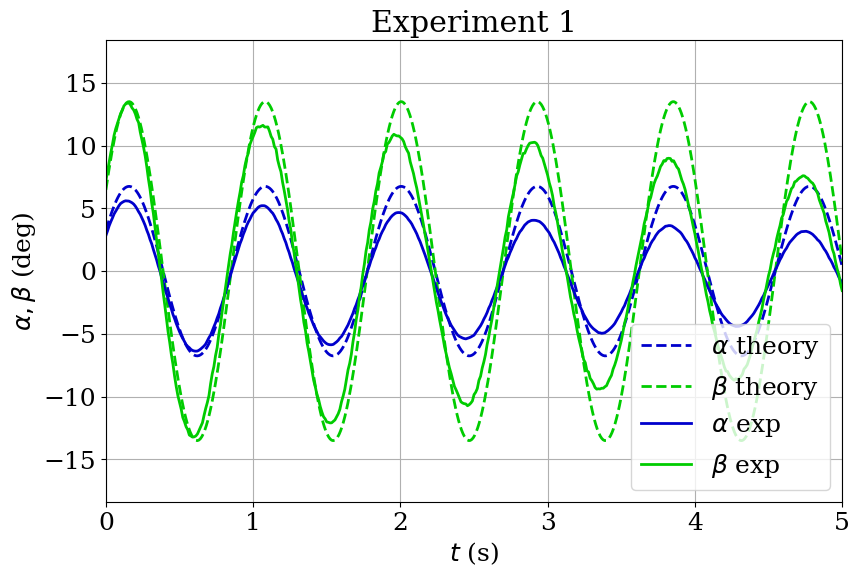

In [129]:
makeplot(make_theoretical_data(13.5,0,0.5,0),Experiment_1)

Now do the same for Experiment_2 and Experiment_3.

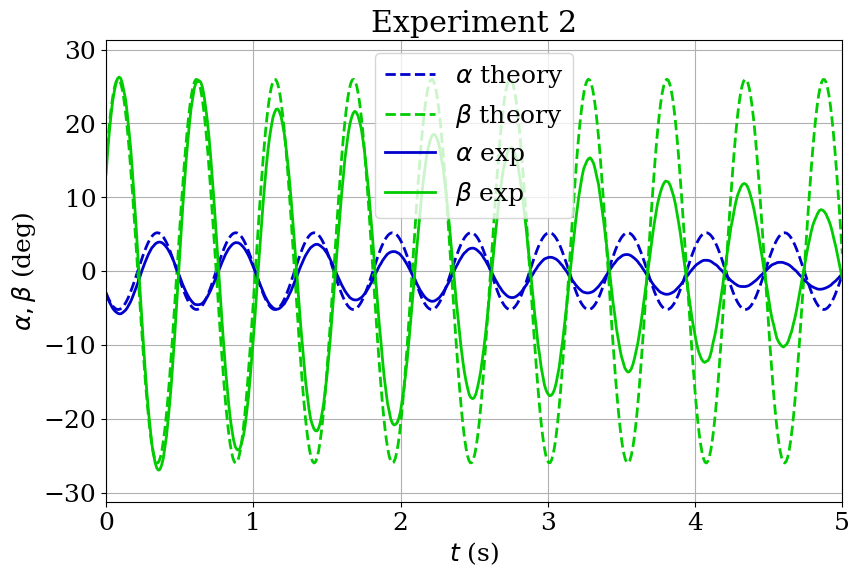

In [130]:
makeplot(make_theoretical_data(0,26,0,0.6),Experiment_2)

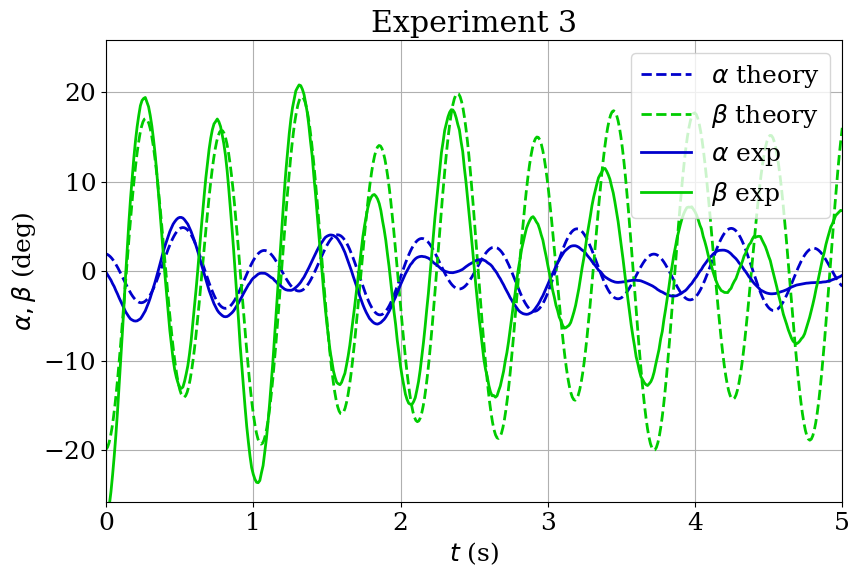

In [131]:
makeplot(make_theoretical_data(3,17,4.5,-1.5),Experiment_3)

A key shortcomming of the theoretical model is that it doesn't account for friction/damping, which is clearly present in the experimental data. Building on last years vibrations course, we should instead try a form like:
$$
\left(\begin{array}{c}
\alpha \\
\beta\end{array}\right)=A_1 \mathrm{e}^{-\gamma_1 t} \left(\begin{array}{c}
ModeShapeRatio_1 \\
1\end{array}\right)\sin{\left(\omega_1 t +\phi_1\right)}+A_2 \mathrm{e}^{-\gamma_2 t} \left(\begin{array}{c}
ModeShapeRatio_2 \\
1\end{array}\right)\sin{\left(\omega_2 t +\phi_2\right)}
$$
where the two modes each decay with a different damping factor $\gamma_1$ and $\gamma_2$. This cell fixes values of $gamma_1$ and $gamma_2$, and then defines a new function

make_theoretical_data_with_damping

which is exactly like make_theoretical_data except it also includes this damping. [FILL IN THE GAPS, perhaps start with gamma1=gamma2=0.5]


In [132]:
gamma1=0.12 #1/seconds
gamma2=0.25 #1/seconds

def make_theoretical_data_with_damping(A1,A2,phi1,phi2):
    t = np.linspace(0,5,500)
    alpha=A1*mode1shaperatio*np.sin(omega1*t+phi1)*np.exp(-gamma1*t)+A2*mode2shaperatio*np.sin(omega2*t+phi2)*np.exp(-gamma2*t)
    beta=A1*np.sin(omega1*t+phi1)*np.exp(-gamma1*t)+A2*np.sin(omega2*t+phi2)*np.exp(-gamma2*t)
    return [t,alpha,beta]

Now plot the damped prediction against the experimental data, and fiddle with all the parameters to get the best fit you can. See if you can find one set of parameters that fit all three experiments well.


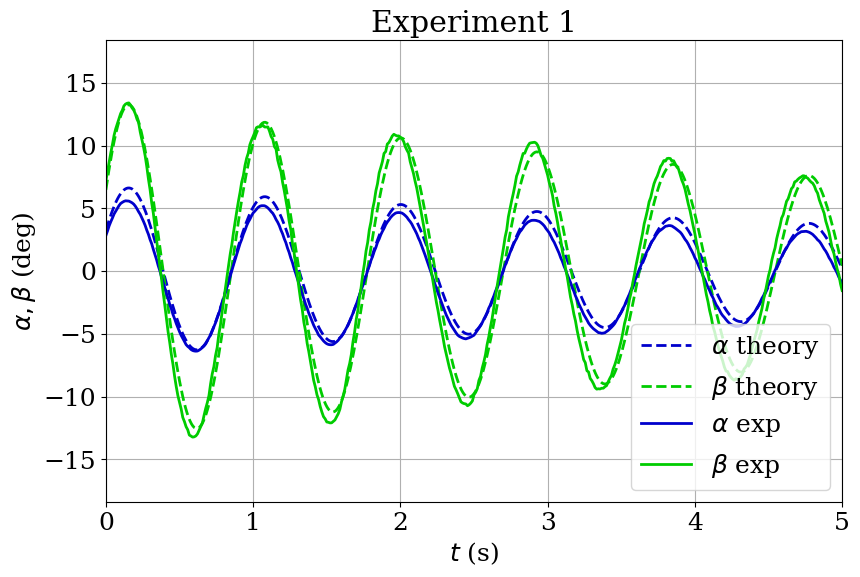

In [133]:
makeplot(make_theoretical_data_with_damping(13.5,0,0.5,0),Experiment_1)

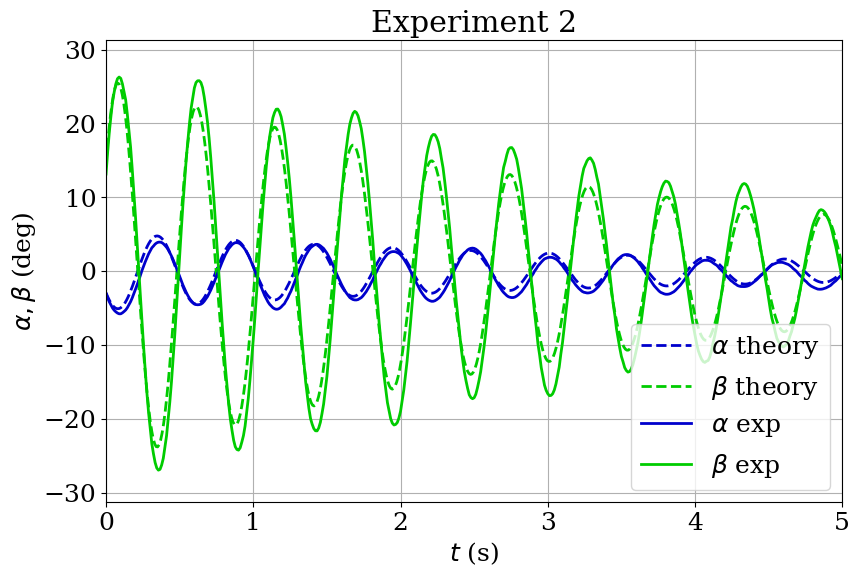

In [134]:
makeplot(make_theoretical_data_with_damping(0,26,0,0.6),Experiment_2)

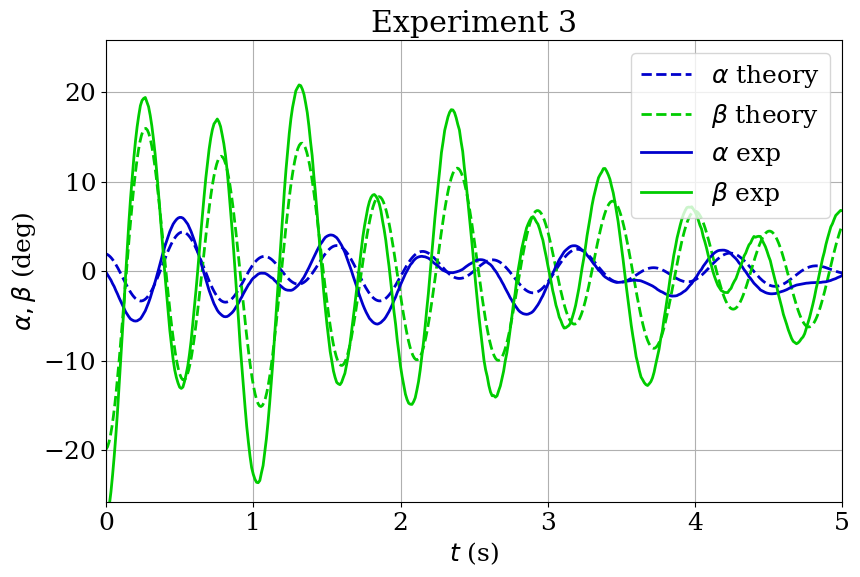

In [135]:
makeplot(make_theoretical_data_with_damping(3,17,4.5,-1.5),Experiment_3)

Now try your own small vibrations data! The cell below makes the first plot for your 1-page submission for D1 lab credit. Try to find some theory parameters that give a good fit - you may wish to re-analyze your own versions of Exp_1 and Exp_2 to find your best values of omega1, omega2, mode1shaperatio, mode2shaperatio - these can drift a little between experiments.

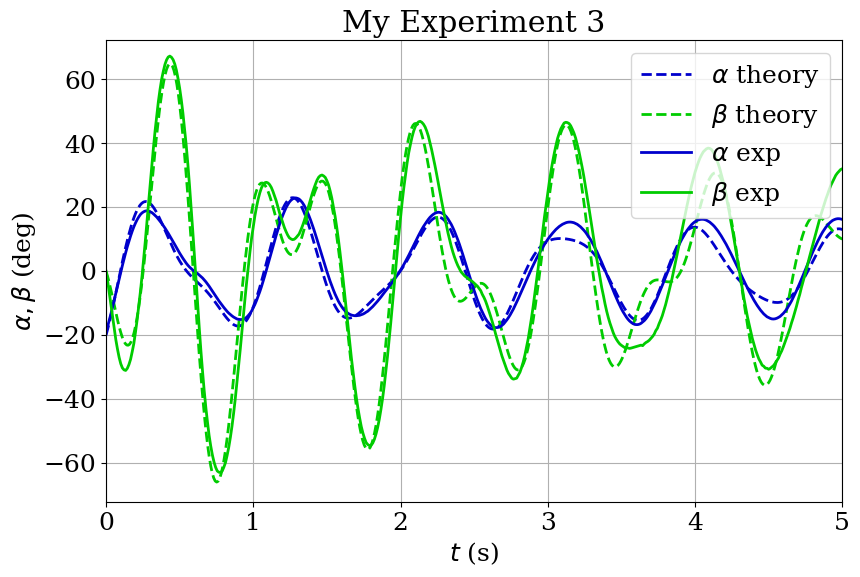

In [199]:
makeplot(make_theoretical_data_with_damping(40,-40,-0.8,-0.8),My_Experiment_3)

Take the My_Experiment_3 plot in the cell above for your report. In a web browswer, you can save the image by simply right clicking on it. Don't forget to also make a note of the theoretical parameters, omega1, omega2, mode1shaperatio, mode2shaperatio, A1, A2, phi1, phi2, gamma1, gamma2